<a href="https://colab.research.google.com/github/nerissavu/CHEG472_Week3_SAF/blob/main/Week3_WS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Data Loading**

In [ ]:
import pandas as pd

# Replace 'your_file.xlsx' with the path to your Excel file
file_path = '/content/SAF Dataset.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Print the first 5 rows of the dataset
print(df.head())
print("Column names and data types:")
for column, dtype in df.dtypes.items():
    print(f"{column}: {dtype}")

       C (%)      H (%)     N (%)      O (%)     S (%)     VM (%)    Ash (%)  \
0  53.041259   6.390897  0.871969  39.366227  0.329647  82.070081   4.884097   
1  52.846674   6.186584  0.436866  40.219842  0.310034  70.783562  12.000000   
2  40.020000   6.010000  0.880000  52.860000  0.230000  72.294705  10.020831   
3  45.739910  10.762332  7.036909  34.908589  1.552259  49.357766  42.020000   
4  44.480000   6.280000  8.210000  40.490000  0.540000  77.497780   6.472025   

      FC (%)    Cel (%)    Hem (%)    Lig (%) Location   \
0  13.045822  37.260000  14.620000  31.680000        US   
1  17.216438  31.300000  24.300000  14.100000        US   
2  17.684464  35.000000  27.500000  10.000000        US   
3   8.626970  35.000000  25.000000  26.500000        US   
4  16.030195  22.775726  55.419525   2.955145        US   

   Plant capacity (kg/hr)   MSP  
0                   25000  0.64  
1                   25000  0.63  
2                   25000  0.69  
3                   25000  0

# **Step2: Check for missing data**

In [ ]:
    print("Missing data information:")
    missing_data = df.isnull().sum()
    missing_percent = 100 * df.isnull().sum() / len(df)
    missing_table = pd.concat([missing_data, missing_percent], axis=1, keys=['Total Missing', 'Percent Missing'])
    total_rows = len(df)

    for column, missing_count in missing_data.items():
        print(f"{column}: {missing_count} missing values ({missing_count/total_rows:.2%})")
    if missing_data.sum() == 0:
        print("No missing data found in the dataset.")
    else:
        print(f"\nTotal number of missing values: {missing_data.sum()}")
        print(f"Percentage of missing data: {missing_data.sum() / np.product(df.shape):.2%}")

Missing data information:
C (%): 0 missing values (0.00%)
H (%): 0 missing values (0.00%)
N (%): 0 missing values (0.00%)
O (%): 0 missing values (0.00%)
S (%): 0 missing values (0.00%)
VM (%): 0 missing values (0.00%)
Ash (%): 0 missing values (0.00%)
FC (%): 0 missing values (0.00%)
Cel (%): 0 missing values (0.00%)
Hem (%): 0 missing values (0.00%)
Lig (%): 0 missing values (0.00%)
Location : 0 missing values (0.00%)
Plant capacity (kg/hr): 0 missing values (0.00%)
MSP: 0 missing values (0.00%)
No missing data found in the dataset.


Once missing value are identified, think about appropriate strategies to handle them

In [ ]:
df_cleaned = df.dropna()
print("\n\nDataset after removing rows with missing values:")
print(f"Shape: {df_cleaned.shape}")
print(f"Rows removed: {len(df) - len(df_cleaned)}")
print("\nFirst few rows of cleaned dataset:")
print(df_cleaned.head())





Dataset after removing rows with missing values:
Shape: (186, 14)
Rows removed: 0

First few rows of cleaned dataset:
       C (%)      H (%)     N (%)      O (%)     S (%)     VM (%)    Ash (%)  \
0  53.041259   6.390897  0.871969  39.366227  0.329647  82.070081   4.884097   
1  52.846674   6.186584  0.436866  40.219842  0.310034  70.783562  12.000000   
2  40.020000   6.010000  0.880000  52.860000  0.230000  72.294705  10.020831   
3  45.739910  10.762332  7.036909  34.908589  1.552259  49.357766  42.020000   
4  44.480000   6.280000  8.210000  40.490000  0.540000  77.497780   6.472025   

      FC (%)    Cel (%)    Hem (%)    Lig (%) Location   \
0  13.045822  37.260000  14.620000  31.680000        US   
1  17.216438  31.300000  24.300000  14.100000        US   
2  17.684464  35.000000  27.500000  10.000000        US   
3   8.626970  35.000000  25.000000  26.500000        US   
4  16.030195  22.775726  55.419525   2.955145        US   

   Plant capacity (kg/hr)   MSP  
0         

You can also filling missing data with specific value (mean, median, mode) or filling missing values with forward or backward filling methods

Forward Fill (ffill) => fills missing values with the last valid (non-missing) value that comes before them in the same column.

Backward Fill (bfill) => fills missing values with the next valid (non-missing) value that comes after them in the same column.

In [ ]:
#df_cleaned = df.ffill()
#method = "forward filling"

# df_cleaned = df.bfill()
# method = "backward filling"

# dropna(how='all') Drop observations where all cells is NA
# dropna(axis=1, how='all') Drop column if all the values are missing
# dropna(thresh = 5) Drop rows that contain less than 5 non-missing values
# fillna(0) Replace missing values with zeros
# isnull() returns True if the value is missing
# notnull() Returns True for non-missing values

# Step 3: Handling Outliers


Numeric columns:
['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)', 'Cel (%)', 'Hem (%)', 'Lig (%)', 'Plant capacity (kg/hr)', 'MSP']

Outliers in C (%):
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: 38.26655454451607
Upper bound: 61.594745965511336


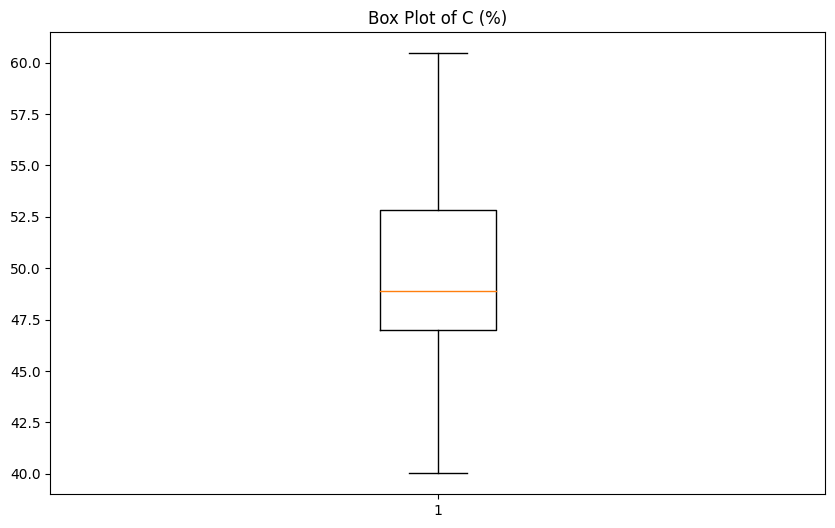


Outliers in H (%):
Number of outliers: 12
Percentage of outliers: 6.45%
Lower bound: 5.199999999999998
Upper bound: 7.280000000000004


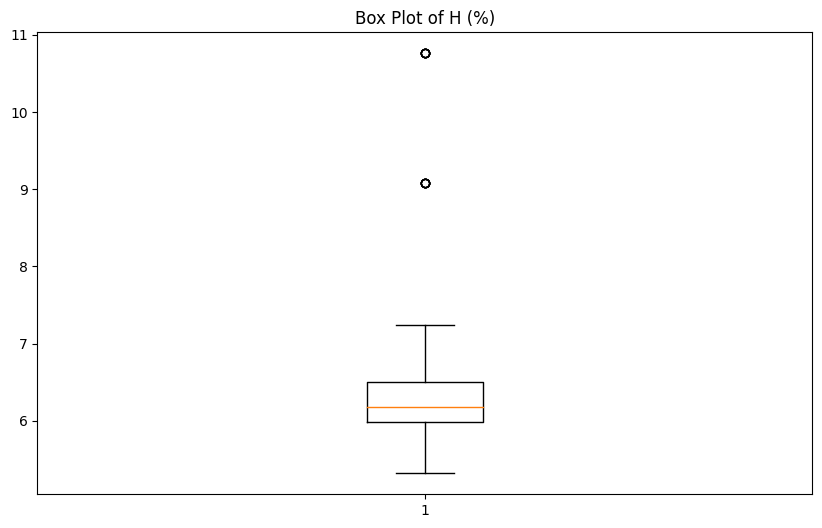


Outliers in N (%):
Number of outliers: 18
Percentage of outliers: 9.68%
Lower bound: -2.0574625566896327
Upper bound: 4.738127169050276


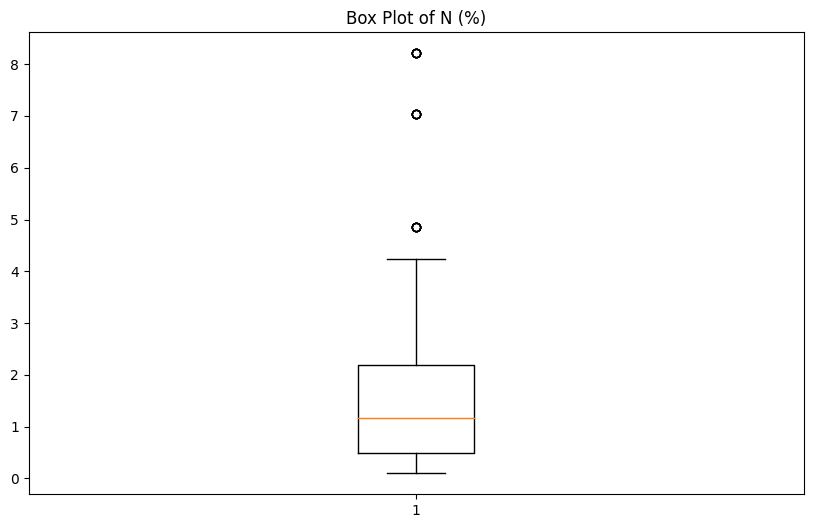


Outliers in O (%):
Number of outliers: 6
Percentage of outliers: 3.23%
Lower bound: 30.080034178395216
Upper bound: 54.843215402376906


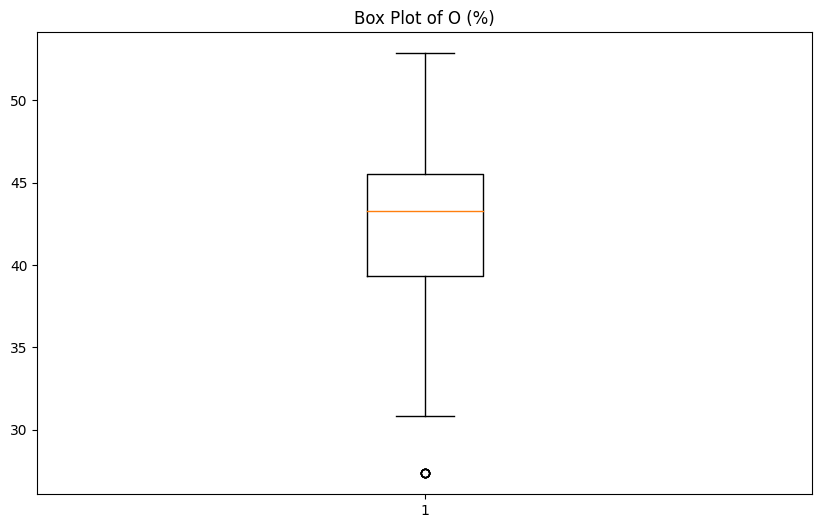


Outliers in S (%):
Number of outliers: 18
Percentage of outliers: 9.68%
Lower bound: -0.46505073280720666
Upper bound: 0.7750845546786778


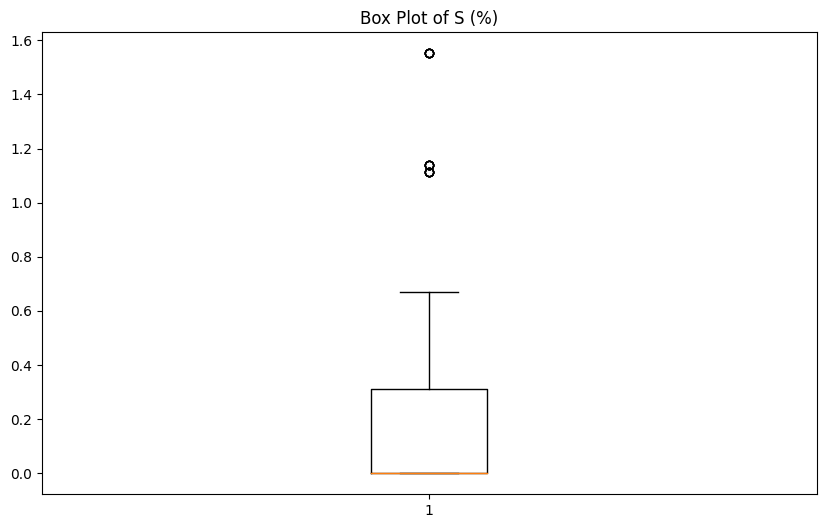


Outliers in VM (%):
Number of outliers: 6
Percentage of outliers: 3.23%
Lower bound: 56.554147465437765
Upper bound: 96.94308755760373


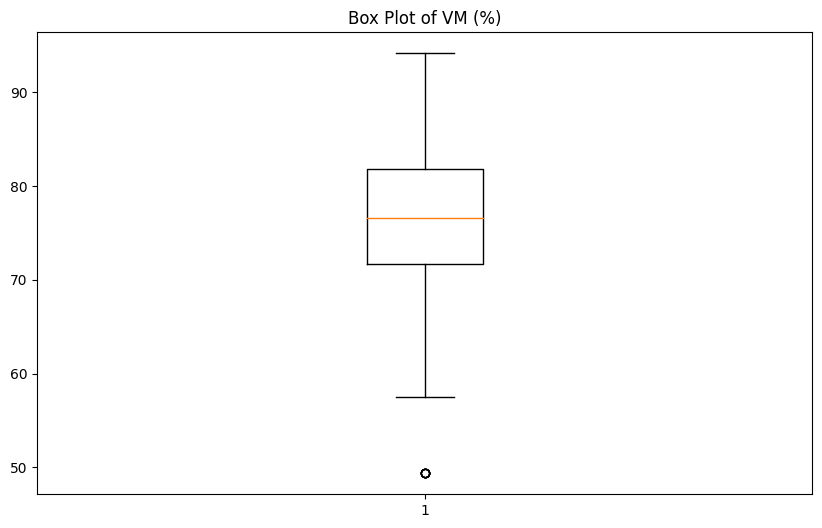


Outliers in Ash (%):
Number of outliers: 6
Percentage of outliers: 3.23%
Lower bound: -17.950000000000003
Upper bound: 34.45


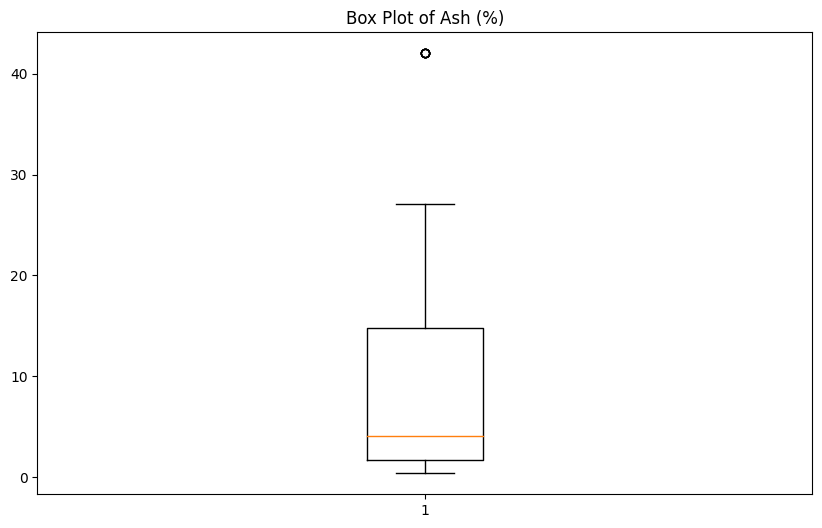


Outliers in FC (%):
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: -1.329507772020749
Upper bound: 33.77370466321245


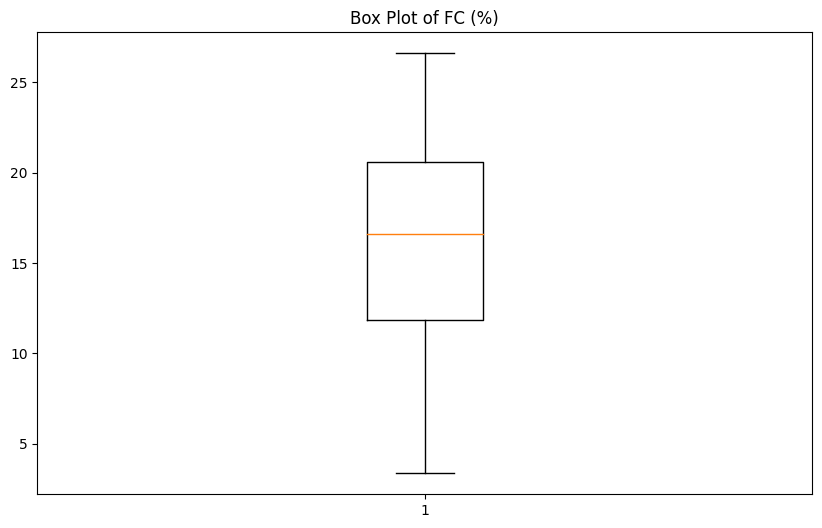


Outliers in Cel (%):
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: -0.9370370370370438
Upper bound: 68.72222222222223


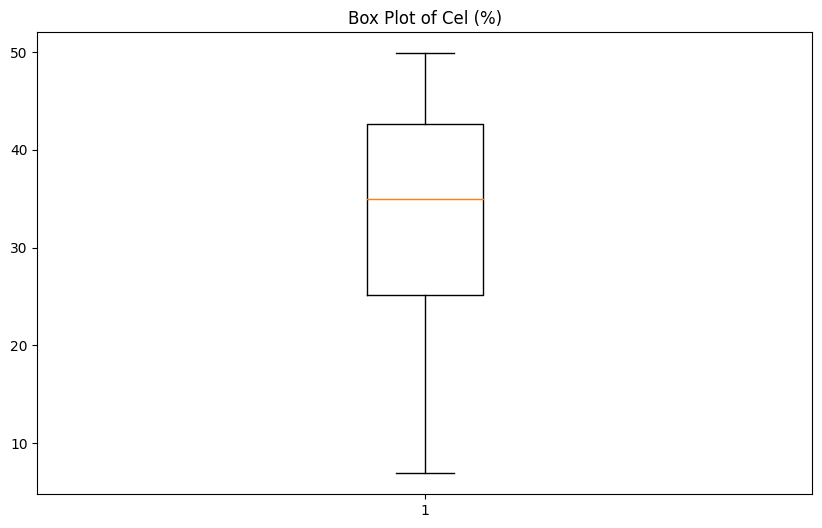


Outliers in Hem (%):
Number of outliers: 12
Percentage of outliers: 6.45%
Lower bound: 10.0
Upper bound: 42.0


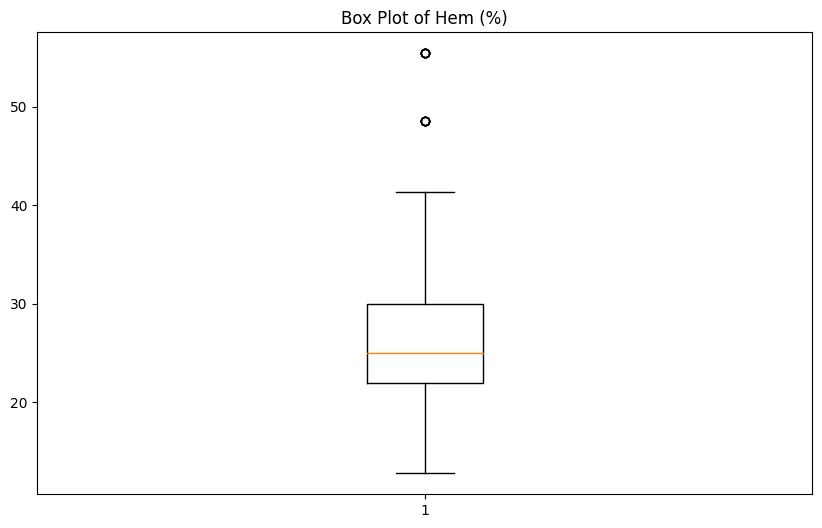


Outliers in Lig (%):
Number of outliers: 6
Percentage of outliers: 3.23%
Lower bound: -3.950000000000003
Upper bound: 45.25


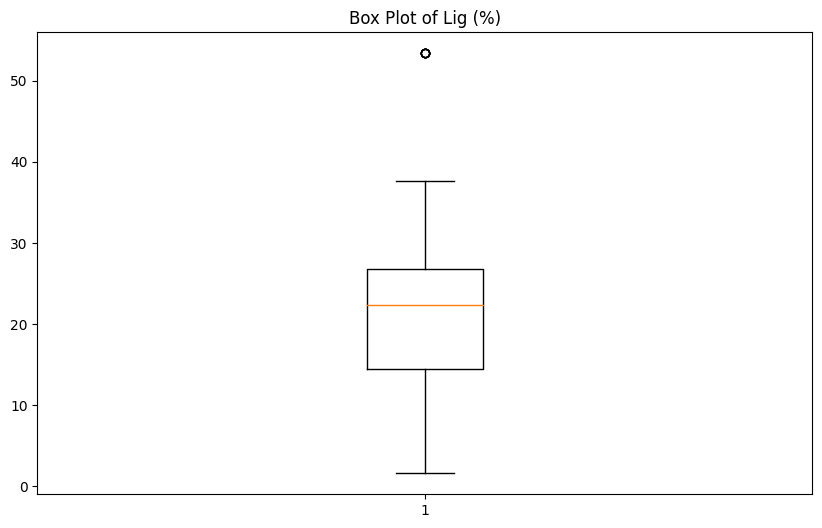


Outliers in Plant capacity (kg/hr):
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: -12500.0
Upper bound: 87500.0


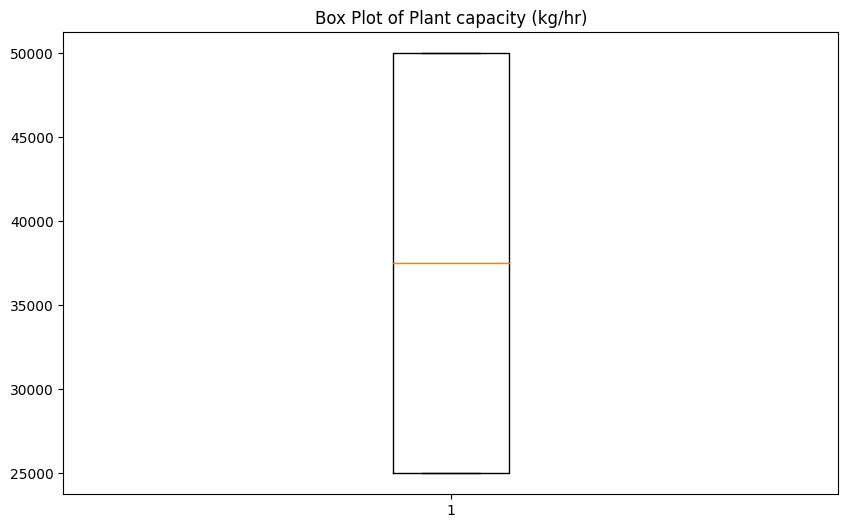


Outliers in MSP:
Number of outliers: 1
Percentage of outliers: 0.54%
Lower bound: 0.1029000000000001
Upper bound: 1.5356999999999998


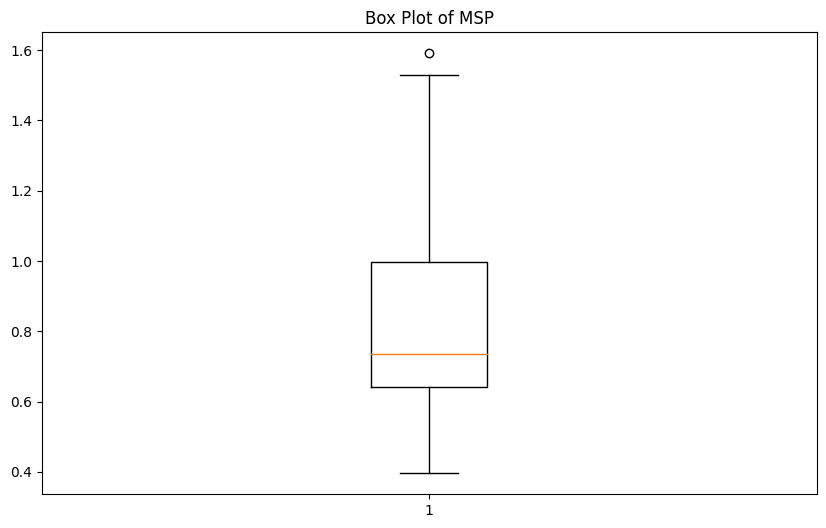

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric columns:")
print(numeric_columns)

outliers = {}

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers[column] = column_outliers

    print(f"\nOutliers in {column}:")
    print(f"Number of outliers: {len(column_outliers)}")
    print(f"Percentage of outliers: {(len(column_outliers) / len(df)) * 100:.2f}%")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")

    # Create a box plot
    plt.figure(figsize=(10, 6))
    plt.title(f"Box Plot of {column}")
    plt.boxplot(df[column])
    plt.show()

how do we normally handle outlier
- Remove
- Tranform the data (log, square root)


In [ ]:
# Print detailed information about detected outliers
for column, outlier_df in outliers.items():
    if not outlier_df.empty:
        print(f"\nDetailed outliers for {column}:")
        print(outlier_df)

# Remove outliers
df_clean = df.copy()

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

print("\nDataset shape after removing outliers:", df_clean.shape)
print(f"Rows removed: {len(df) - len(df_clean)}")


Detailed outliers for H (%):
        C (%)      H (%)     N (%)      O (%)     S (%)     VM (%)   Ash (%)  \
3    45.73991  10.762332  7.036909  34.908589  1.552259  49.357766  42.02000   
30   60.46000   9.080000  3.100000  27.360000  0.000000  85.683987   2.33298   
34   45.73991  10.762332  7.036909  34.908589  1.552259  49.357766  42.02000   
61   60.46000   9.080000  3.100000  27.360000  0.000000  85.683987   2.33298   
65   45.73991  10.762332  7.036909  34.908589  1.552259  49.357766  42.02000   
92   60.46000   9.080000  3.100000  27.360000  0.000000  85.683987   2.33298   
96   45.73991  10.762332  7.036909  34.908589  1.552259  49.357766  42.02000   
123  60.46000   9.080000  3.100000  27.360000  0.000000  85.683987   2.33298   
127  45.73991  10.762332  7.036909  34.908589  1.552259  49.357766  42.02000   
154  60.46000   9.080000  3.100000  27.360000  0.000000  85.683987   2.33298   
158  45.73991  10.762332  7.036909  34.908589  1.552259  49.357766  42.02000   
185  60.46

# **Step 4: Summary Statistics**

In [ ]:
def describe_with_iqr(df):
    desc = df.describe()
    q1 = desc.loc['25%']
    q3 = desc.loc['75%']
    iqr = q3 - q1
    desc.loc['IQR'] = iqr
    return desc

# Get the enhanced description
enhanced_desc = describe_with_iqr(df_clean)

# Print the enhanced description
print(enhanced_desc)

            C (%)       H (%)       N (%)       O (%)       S (%)      VM (%)  \
count  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000   
mean    49.155055    6.133785    1.133585   43.477464    0.100113   76.987560   
std      3.331214    0.369787    0.934751    3.389774    0.177063    7.507857   
min     40.020000    5.320000    0.100000   37.293729    0.000000   60.840000   
25%     47.649030    5.980000    0.450000   40.600000    0.000000   72.950000   
50%     48.867116    6.120000    0.871969   43.440000    0.000000   77.318919   
75%     51.710000    6.256410    1.580158   45.557022    0.121371   81.797235   
max     55.235524    7.236989    4.246211   52.860000    0.671063   94.161220   
IQR      4.060970    0.276410    1.130158    4.957022    0.121371    8.847235   

          Ash (%)      FC (%)     Cel (%)     Hem (%)     Lig (%)  \
count  150.000000  150.000000  150.000000  150.000000  150.000000   
mean     6.705238   16.307202   36.206543   25.6279

In [ ]:
from scipy import stats
import seaborn as sns

# Select numeric columns
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns

def analyze_distribution(df, column):
    # Descriptive statistics
    desc = df[column].describe()

    # Skewness and Kurtosis
    skewness = df[column].skew()
    kurtosis = df[column].kurtosis()

    # Shapiro-Wilk test for normality
    _, p_value = stats.shapiro(df[column].dropna())

    print(f"\nAnalysis for {column}:")
    print(desc)
    print(f"Skewness: {skewness:.2f}")
    print(f"Kurtosis: {kurtosis:.2f}")
    print(f"Shapiro-Wilk test p-value: {p_value:.4f}")

    if p_value < 0.05:
        print("The data is likely not normally distributed.")
    else:
        print("The data may be normally distributed.")

    if abs(skewness) > 0.5:
        print(f"The data is {'positively' if skewness > 0 else 'negatively'} skewed.")
    else:
        print("The data is approximately symmetric.")

    # # Visualizations
    # fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

    # # Histogram with KDE
    # sns.histplot(df[column].dropna(), kde=True, ax=ax1)
    # ax1.set_title(f"Histogram of {column}")

    # # Q-Q plot
    # stats.probplot(df[column].dropna(), dist="norm", plot=ax2)
    # ax2.set_title(f"Q-Q Plot of {column}")

    # # Box plot
    # sns.boxplot(x=df[column].dropna(), ax=ax3)
    # ax3.set_title(f"Box Plot of {column}")

    plt.tight_layout()
    plt.show()

# Analyze each numeric column
for column in numeric_columns:
    analyze_distribution(df_clean, column)


Analysis for C (%):
count    150.000000
mean      49.155055
std        3.331214
min       40.020000
25%       47.649030
50%       48.867116
75%       51.710000
max       55.235524
Name: C (%), dtype: float64
Skewness: -0.48
Kurtosis: 0.52
Shapiro-Wilk test p-value: 0.0000
The data is likely not normally distributed.
The data is approximately symmetric.


<Figure size 640x480 with 0 Axes>


Analysis for H (%):
count    150.000000
mean       6.133785
std        0.369787
min        5.320000
25%        5.980000
50%        6.120000
75%        6.256410
max        7.236989
Name: H (%), dtype: float64
Skewness: 0.57
Kurtosis: 1.83
Shapiro-Wilk test p-value: 0.0000
The data is likely not normally distributed.
The data is positively skewed.


<Figure size 640x480 with 0 Axes>


Analysis for N (%):
count    150.000000
mean       1.133585
std        0.934751
min        0.100000
25%        0.450000
50%        0.871969
75%        1.580158
max        4.246211
Name: N (%), dtype: float64
Skewness: 1.55
Kurtosis: 2.71
Shapiro-Wilk test p-value: 0.0000
The data is likely not normally distributed.
The data is positively skewed.


<Figure size 640x480 with 0 Axes>


Analysis for O (%):
count    150.000000
mean      43.477464
std        3.389774
min       37.293729
25%       40.600000
50%       43.440000
75%       45.557022
max       52.860000
Name: O (%), dtype: float64
Skewness: 0.35
Kurtosis: 0.66
Shapiro-Wilk test p-value: 0.0000
The data is likely not normally distributed.
The data is approximately symmetric.


<Figure size 640x480 with 0 Axes>


Analysis for S (%):
count    150.000000
mean       0.100113
std        0.177063
min        0.000000
25%        0.000000
50%        0.000000
75%        0.121371
max        0.671063
Name: S (%), dtype: float64
Skewness: 1.84
Kurtosis: 2.60
Shapiro-Wilk test p-value: 0.0000
The data is likely not normally distributed.
The data is positively skewed.


<Figure size 640x480 with 0 Axes>


Analysis for VM (%):
count    150.000000
mean      76.987560
std        7.507857
min       60.840000
25%       72.950000
50%       77.318919
75%       81.797235
max       94.161220
Name: VM (%), dtype: float64
Skewness: -0.19
Kurtosis: 0.34
Shapiro-Wilk test p-value: 0.0003
The data is likely not normally distributed.
The data is approximately symmetric.


<Figure size 640x480 with 0 Axes>


Analysis for Ash (%):
count    150.000000
mean       6.705238
std        7.057265
min        0.400000
25%        1.540000
50%        2.970000
75%       10.020831
max       22.550000
Name: Ash (%), dtype: float64
Skewness: 1.12
Kurtosis: -0.10
Shapiro-Wilk test p-value: 0.0000
The data is likely not normally distributed.
The data is positively skewed.


<Figure size 640x480 with 0 Axes>


Analysis for FC (%):
count    150.000000
mean      16.307202
std        6.288224
min        3.366013
25%       13.045822
50%       16.722026
75%       20.610000
max       26.600000
Name: FC (%), dtype: float64
Skewness: -0.42
Kurtosis: -0.42
Shapiro-Wilk test p-value: 0.0000
The data is likely not normally distributed.
The data is approximately symmetric.


<Figure size 640x480 with 0 Axes>


Analysis for Cel (%):
count    150.000000
mean      36.206543
std        8.261125
min       21.000000
25%       30.000000
50%       37.500000
75%       44.400000
max       49.873571
Name: Cel (%), dtype: float64
Skewness: -0.43
Kurtosis: -0.87
Shapiro-Wilk test p-value: 0.0000
The data is likely not normally distributed.
The data is approximately symmetric.


<Figure size 640x480 with 0 Axes>


Analysis for Hem (%):
count    150.000000
mean      25.627964
std        7.760810
min       12.800000
25%       22.000000
50%       24.300000
75%       28.000000
max       41.370000
Name: Hem (%), dtype: float64
Skewness: 0.55
Kurtosis: -0.13
Shapiro-Wilk test p-value: 0.0000
The data is likely not normally distributed.
The data is positively skewed.


<Figure size 640x480 with 0 Axes>


Analysis for Lig (%):
count    150.000000
mean      21.561196
std        8.714119
min        2.110000
25%       17.380000
50%       22.400000
75%       26.800000
max       37.700000
Name: Lig (%), dtype: float64
Skewness: -0.47
Kurtosis: -0.23
Shapiro-Wilk test p-value: 0.0003
The data is likely not normally distributed.
The data is approximately symmetric.


<Figure size 640x480 with 0 Axes>


Analysis for Plant capacity (kg/hr):
count      150.000000
mean     37500.000000
std      12541.876164
min      25000.000000
25%      25000.000000
50%      37500.000000
75%      50000.000000
max      50000.000000
Name: Plant capacity (kg/hr), dtype: float64
Skewness: 0.00
Kurtosis: -2.03
Shapiro-Wilk test p-value: 0.0000
The data is likely not normally distributed.
The data is approximately symmetric.


<Figure size 640x480 with 0 Axes>


Analysis for MSP:
count    150.000000
mean       0.763807
std        0.220407
min        0.396000
25%        0.640000
50%        0.703600
75%        0.996300
max        1.268800
Name: MSP, dtype: float64
Skewness: 0.10
Kurtosis: -0.98
Shapiro-Wilk test p-value: 0.0000
The data is likely not normally distributed.
The data is approximately symmetric.


<Figure size 640x480 with 0 Axes>

# **Step 5: One-Hot Encoding for Categorical Variable**

In [ ]:
# Identify categorical columns
categorical_columns = df_clean.select_dtypes(include=['object']).columns

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns, prefix=categorical_columns)

# Display the encoded dataframe
print("\nEncoded DataFrame:")
print(df_encoded.head())
print("\nEncoded DataFrame Info:")
print(df_encoded.info())


Encoded DataFrame:
       C (%)     H (%)     N (%)      O (%)     S (%)     VM (%)    Ash (%)  \
0  53.041259  6.390897  0.871969  39.366227  0.329647  82.070081   4.884097   
1  52.846674  6.186584  0.436866  40.219842  0.310034  70.783562  12.000000   
2  40.020000  6.010000  0.880000  52.860000  0.230000  72.294705  10.020831   
5  44.695108  7.236989  1.194997  46.872906  0.000000  94.161220   2.472767   
6  45.019652  6.569343  2.189781  46.221224  0.000000  76.122673  18.948521   

      FC (%)  Cel (%)  Hem (%)  Lig (%)  Plant capacity (kg/hr)   MSP  \
0  13.045822    37.26    14.62    31.68                   25000  0.64   
1  17.216438    31.30    24.30    14.10                   25000  0.63   
2  17.684464    35.00    27.50    10.00                   25000  0.69   
5   3.366013    45.00    27.00    10.00                   25000  0.78   
6   4.928806    21.00    28.00    21.00                   25000  0.63   

   Location _China  Location _UK  Location _US  
0            Fals

# **Step 6: Checking for redundant Columns**

Objective: Identify columns that does not provide necessary information for analysis

Task:
- Have constant value across all rows
- Contain information that duplicates another column
- Have no relevance to the analysis



In [ ]:
# 1. Identify columns with constant value
constant_columns = [col for col in df_encoded.columns if df_encoded[col].nunique() == 1]

# 2. Identify duplicate columns
duplicate_columns = []
for i in range(len(df_encoded.columns)):
    for j in range(i+1, len(df_encoded.columns)):
        if df_encoded.iloc[:, i].equals(df_encoded.iloc[:, j]):
            duplicate_columns.append(df_encoded.columns[j])


# Print results
print("\nColumns with constant value:")
for col in constant_columns:
    print(f"- {col} (value: {df_encoded[col].iloc[0]})")

print("\nDuplicate columns:")
for col in duplicate_columns:
    print(f"- {col}")

# # 3. Remove duplicate columns
# df_cleaned = df_encoded.drop(columns=duplicate_columns)


Columns with constant value:

Duplicate columns:


Follow up: I don't think any column is redundant

# **Step 7: Correlation and Heatmaps**
Task
- Generate a correlation matrix to identify any strong positive or negative
- Create a heatmap to visually represent the correlation between feature



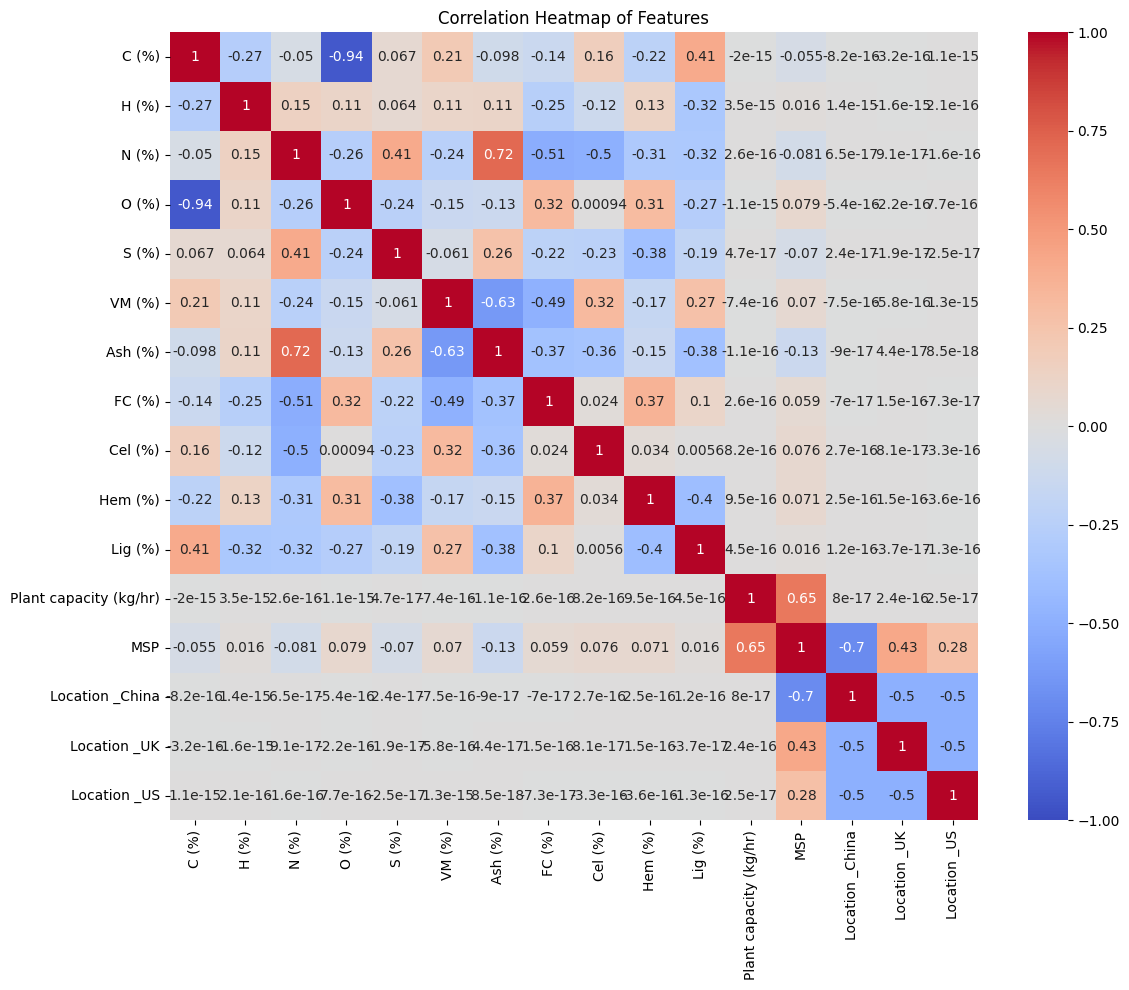

In [ ]:
# Generate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

In [ ]:
# Identify strong correlations
strong_correlations = (correlation_matrix.abs() > 0.7) & (correlation_matrix != 1.0)
strong_corr_pairs = [(correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
                     for i in range(len(correlation_matrix.index))
                     for j in range(i+1, len(correlation_matrix.columns))
                     if strong_correlations.iloc[i, j]]

# Print strong correlations
print("Strong correlations (|r| > 0.7):")
for pair in strong_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

Strong correlations (|r| > 0.7):
C (%) and O (%): -0.94
N (%) and Ash (%): 0.72
MSP and Location _China: -0.70


Follow up: Analyze which features show significant correlations. Discuss whether these correlations make sense in the context of fast pyrolysis and SAF production. Are there any surprising or interesting findings



1. C (%) and O (%) ( strong negative correlation = -0.81)
Biomass is primarily composed of carbon, hydrogen, and oxygen. As the carbon content increases, the oxygen content typically decreases, hence the negative correlation.
2. N (%) and S (%): (strong positive correlation = 0.72 )
The positive correlation suggests that feedstocks high in nitrogen are also likely to be high in sulfur.
3. S (%) and Ash (%): (strong positive correlation =  0.74)
- Ash represents the inorganic content of the biomass, and some sulfur can be bound in inorganic compounds.
- The correlation suggests that high-ash feedstocks are likely to also have higher sulfur content
4. VM (%) and Ash (%): (strong negative correlation = -0.78 )
- Volatile Matter represents the portion of biomass that readily vaporizes during pyrolysis, contributing to bio-oil yield.
- Higher ash content is generally undesirable in pyrolysis as it can lead to reactor fouling and catalytic effects that may alter product distribution.
- The negative correlation with ash content is expected because ash is the non-volatile, inorganic portion of the biomass.
- Higher VM and lower ash are generally desirable for pyrolysis and SAF production because:1. Higher VM can lead to higher bio-oil yields during pyrolysis.2. Lower ash content means fewer problems with reactor fouling and fewer inorganic contaminants in the bio-oil.



# **Step 8: Visualizing Data Relationship**

- Create visualization that showcase potential trends or relationship between key variable
+ Scatter plots (For continuous variables)
+ Pair plots to see relationships across multiple variable
+ Bar plots or count plots (for categorical variable)

Followup: Reflect on the relationship you observe. Which variable seem to influence the MSP of SAF the most. Are there any unexpected patterns

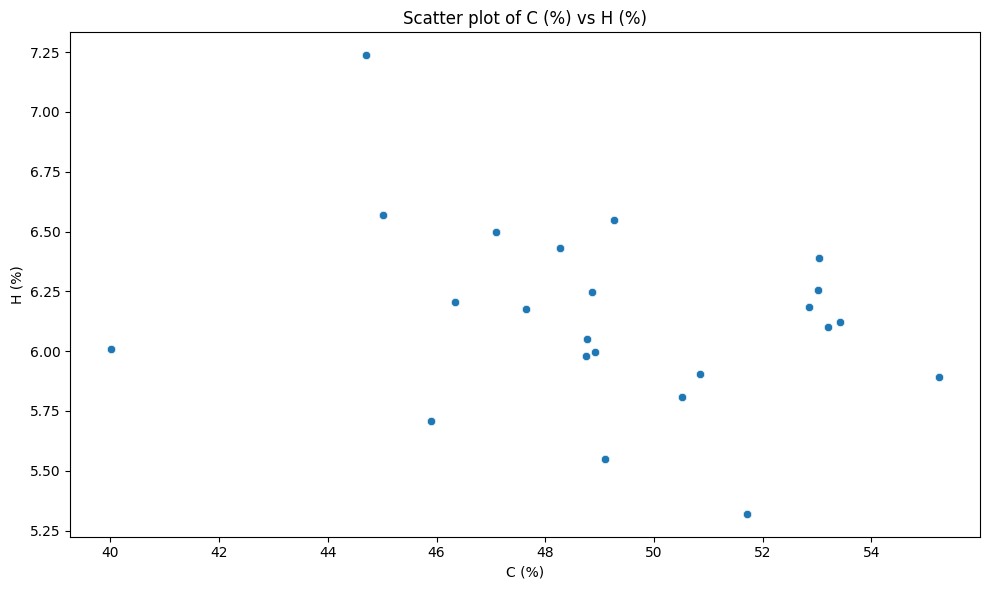

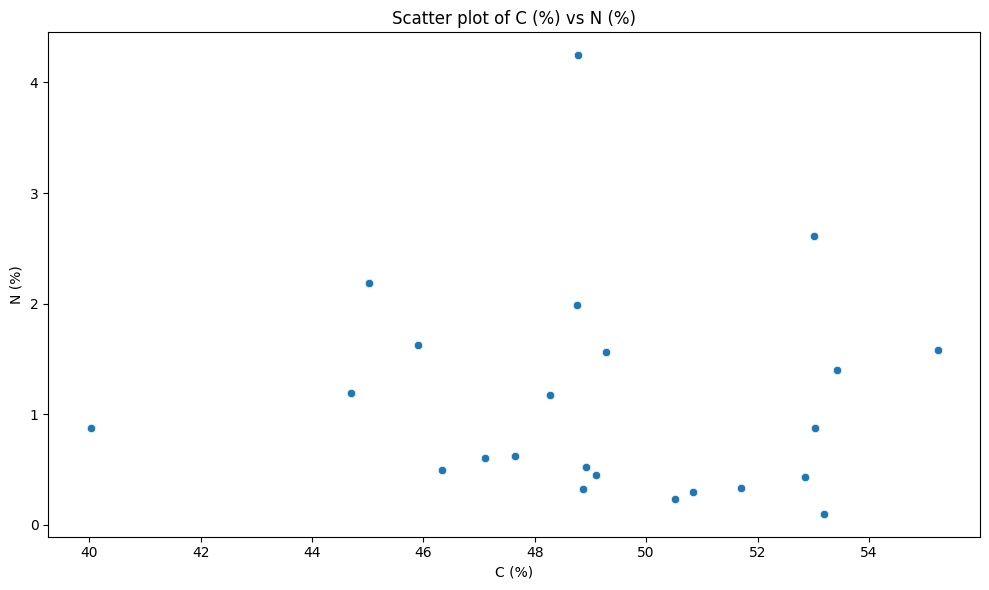

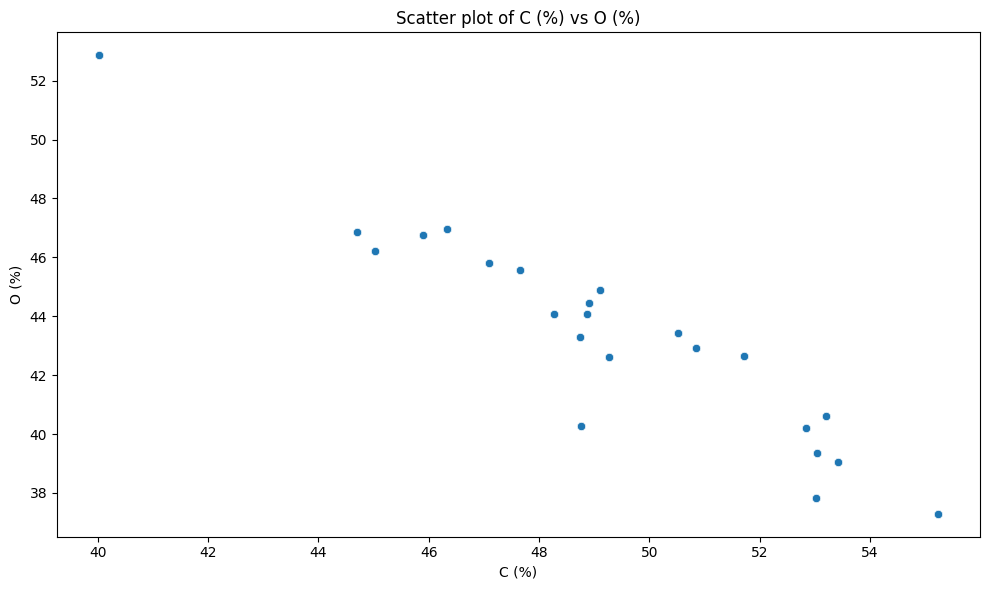

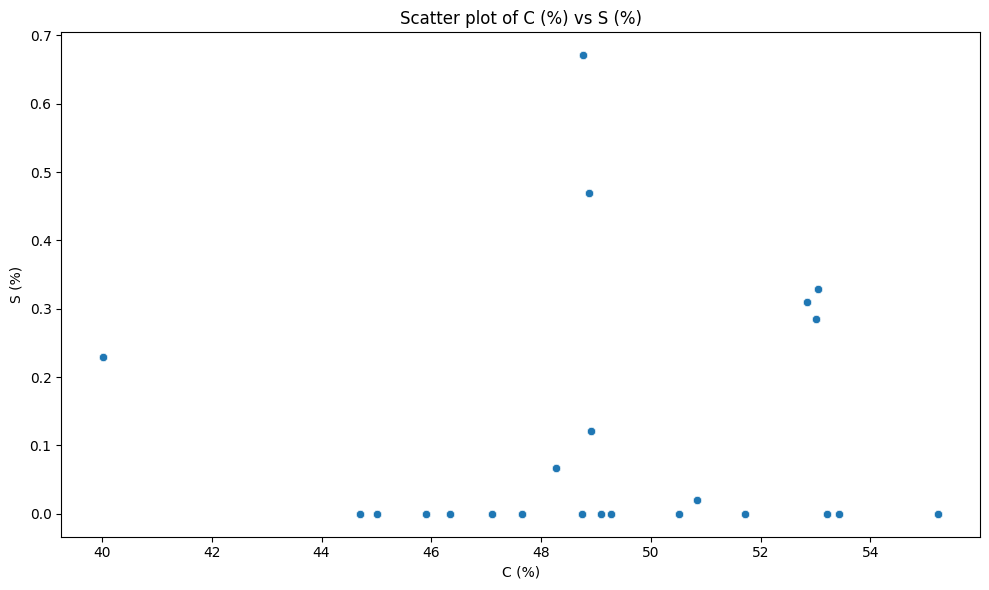

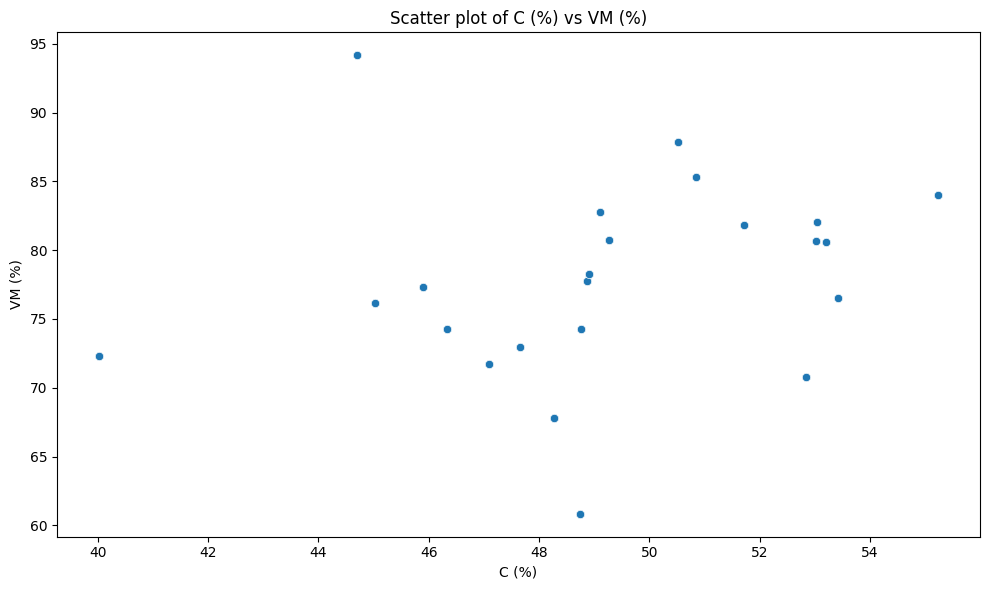

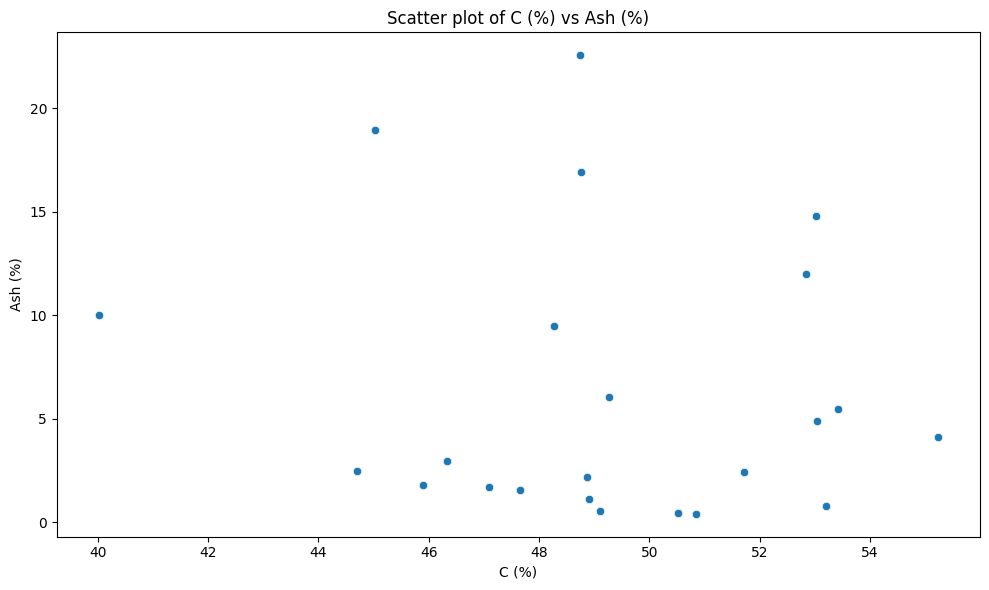

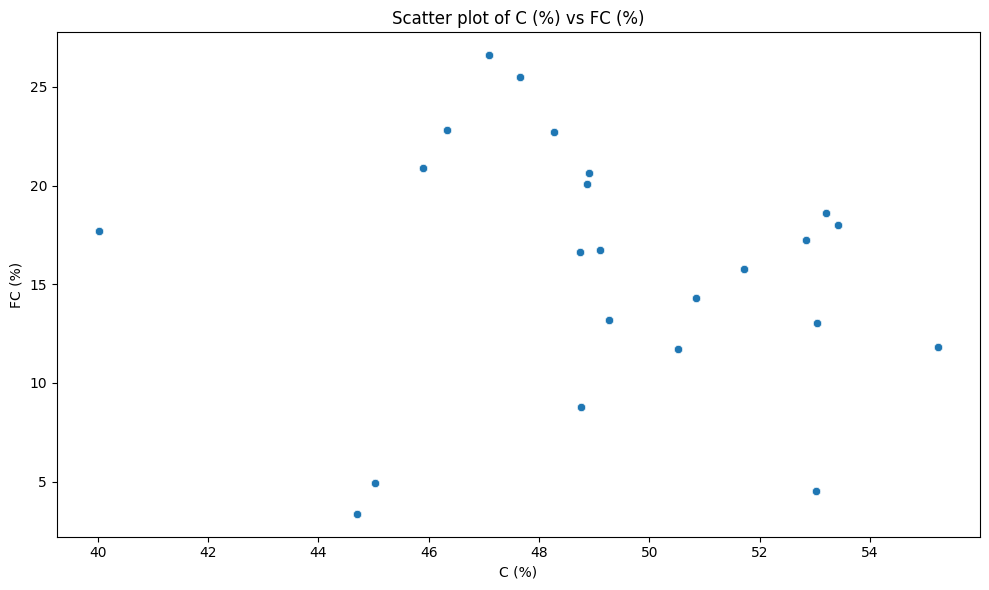

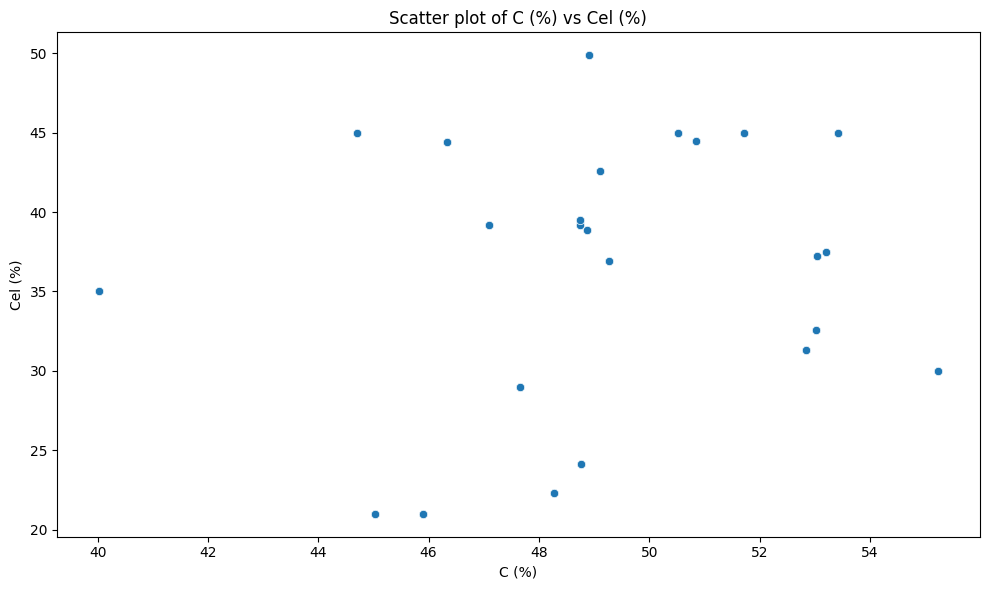

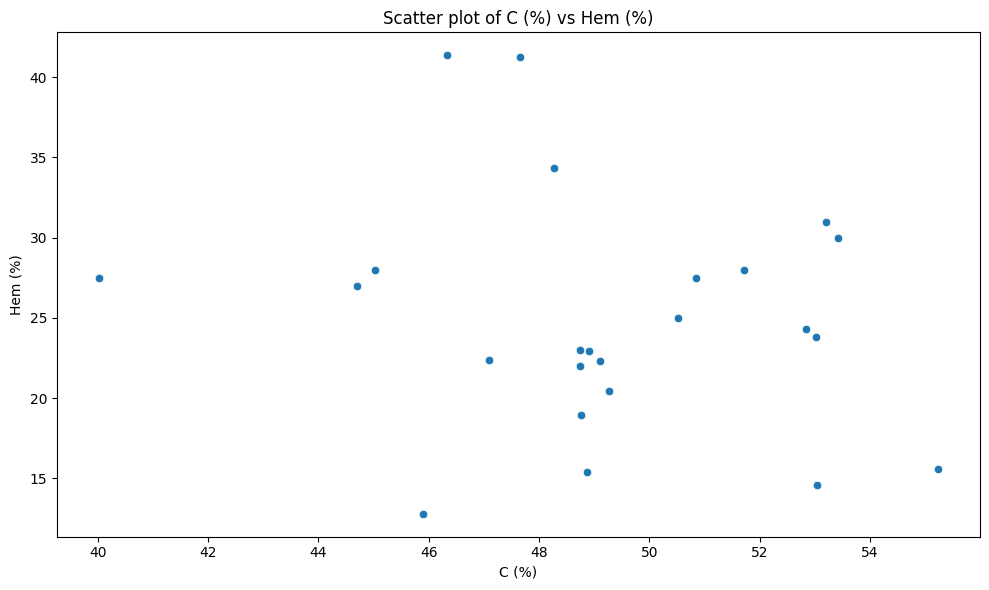

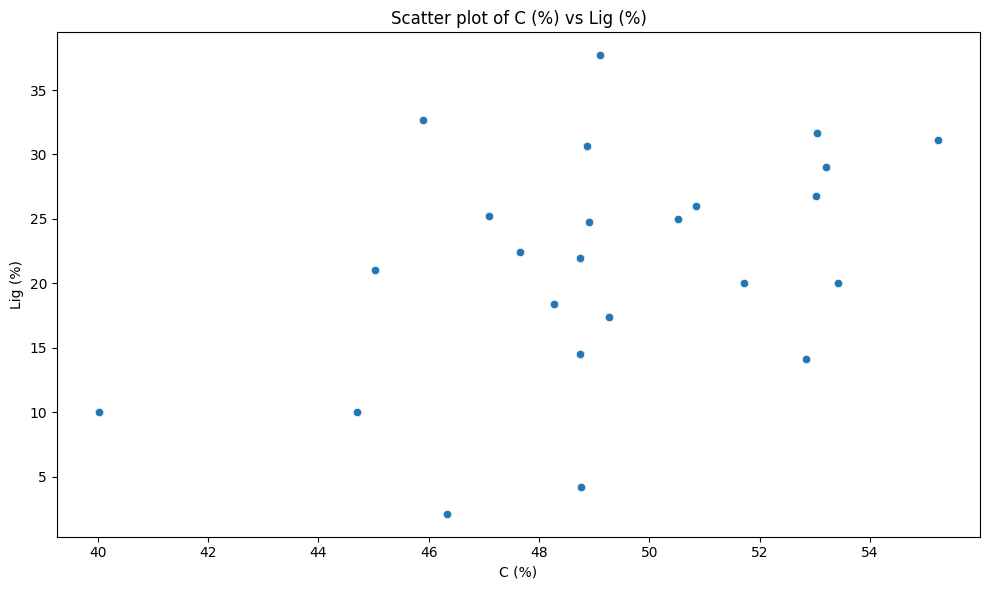

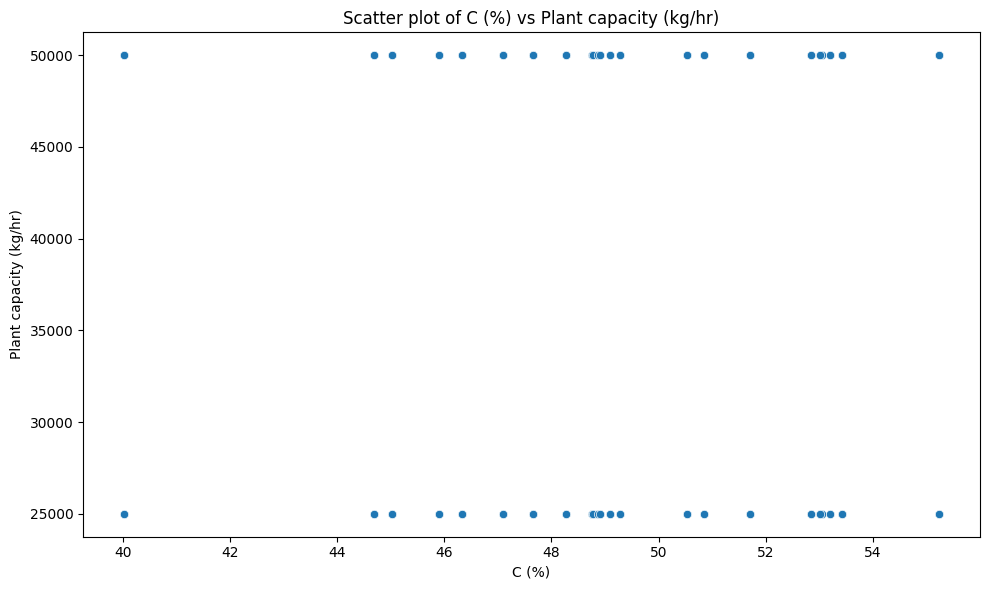

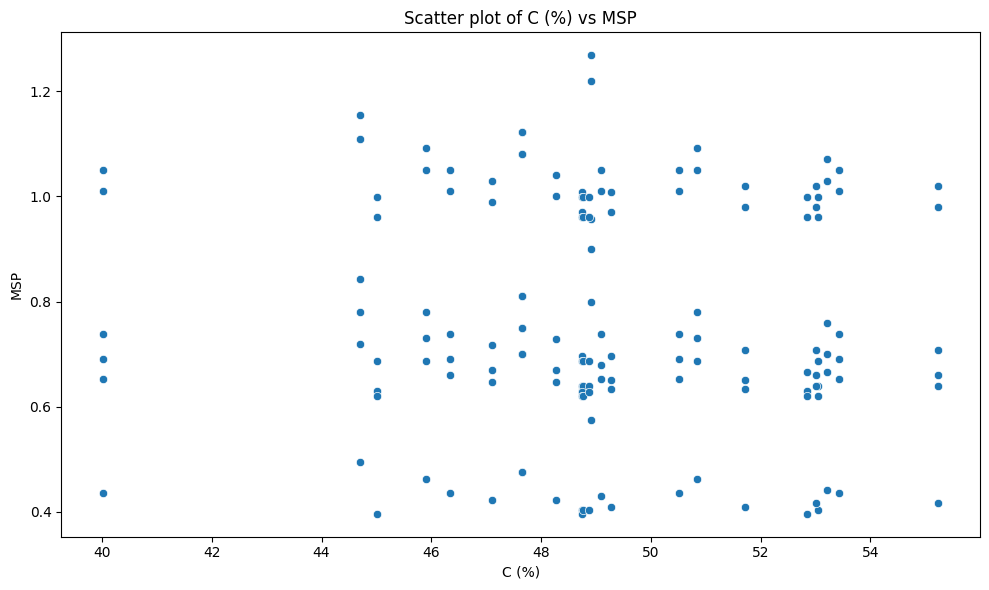

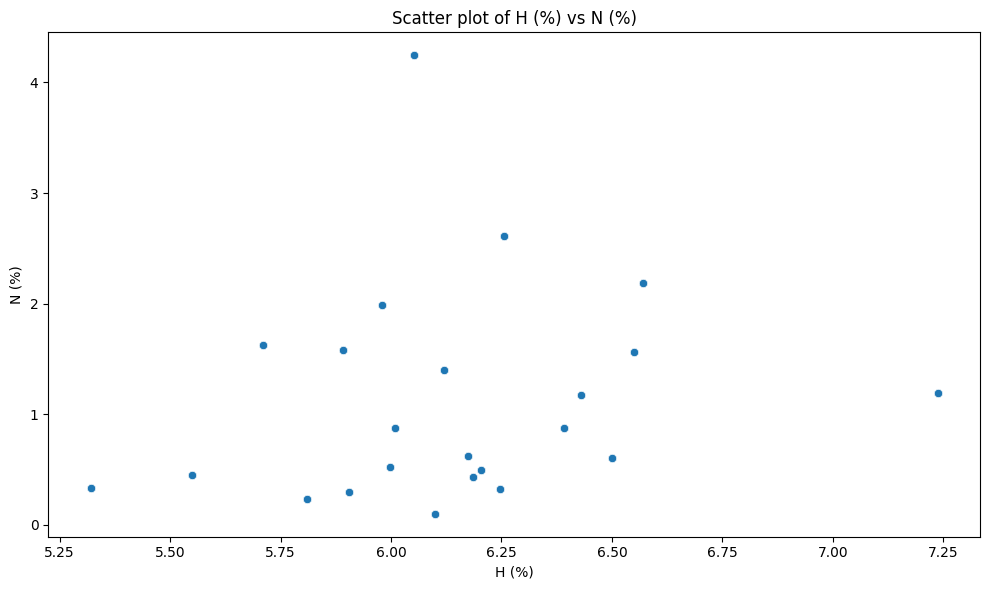

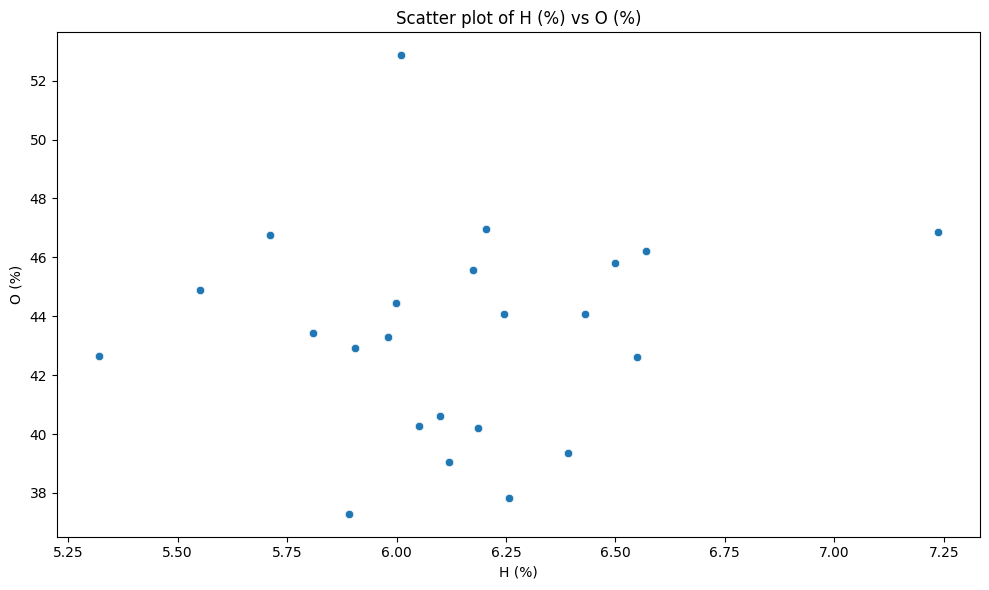

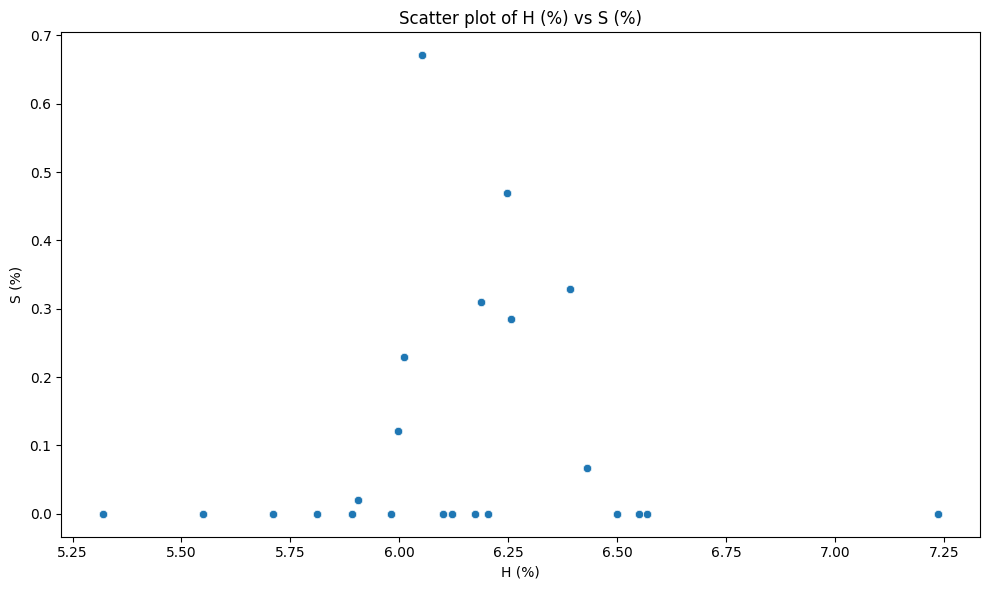

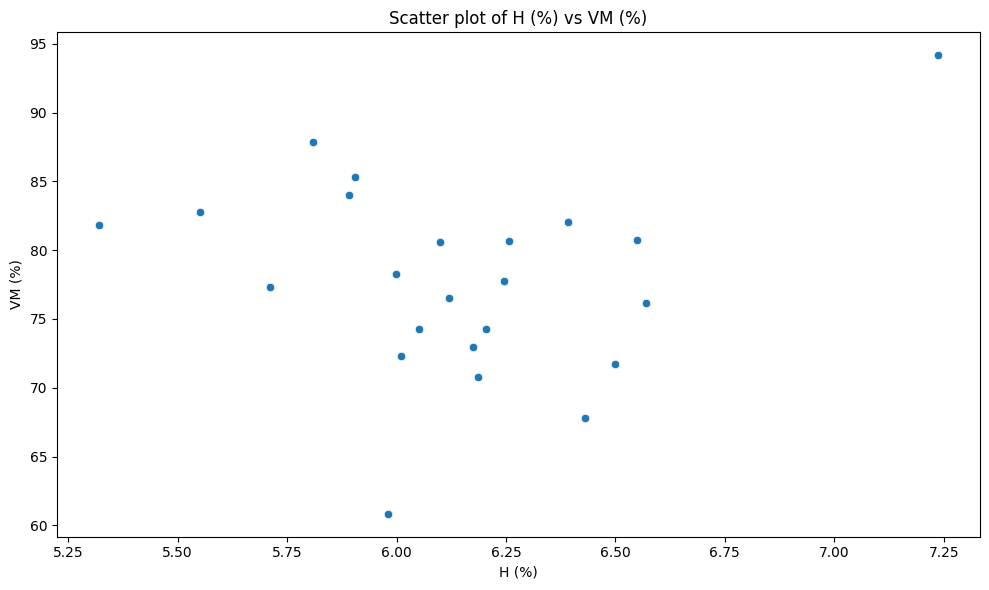

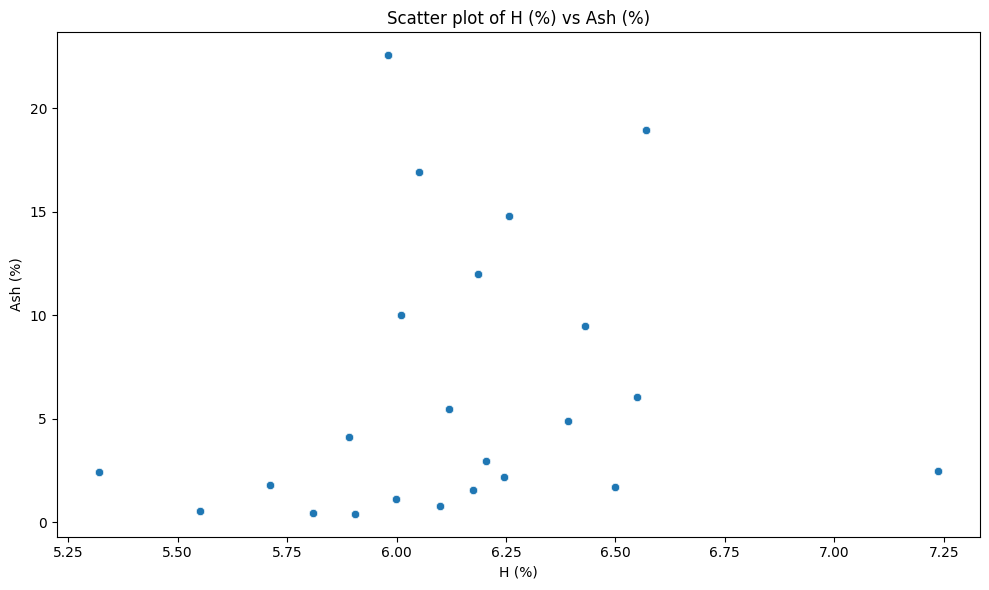

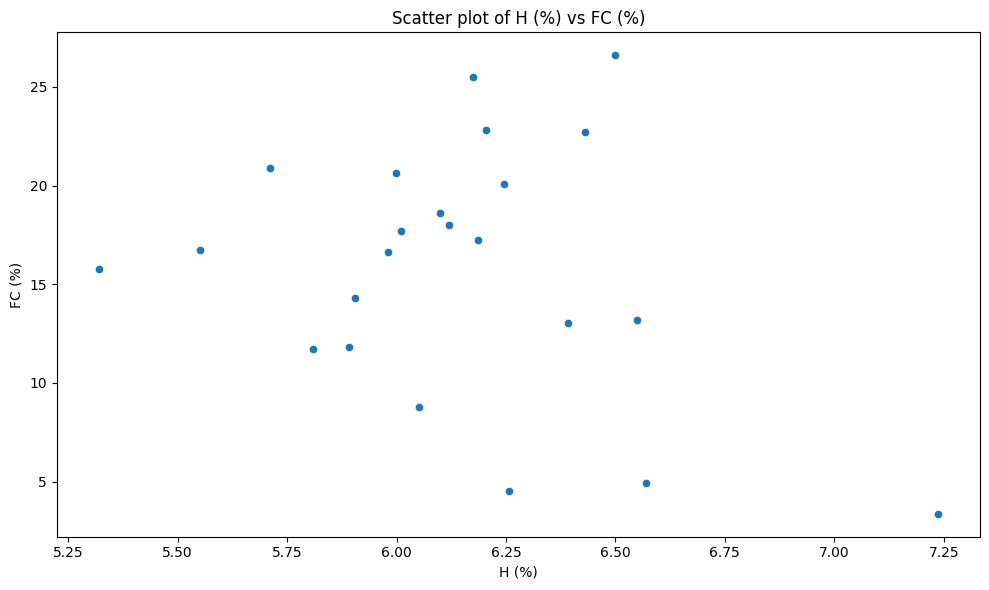

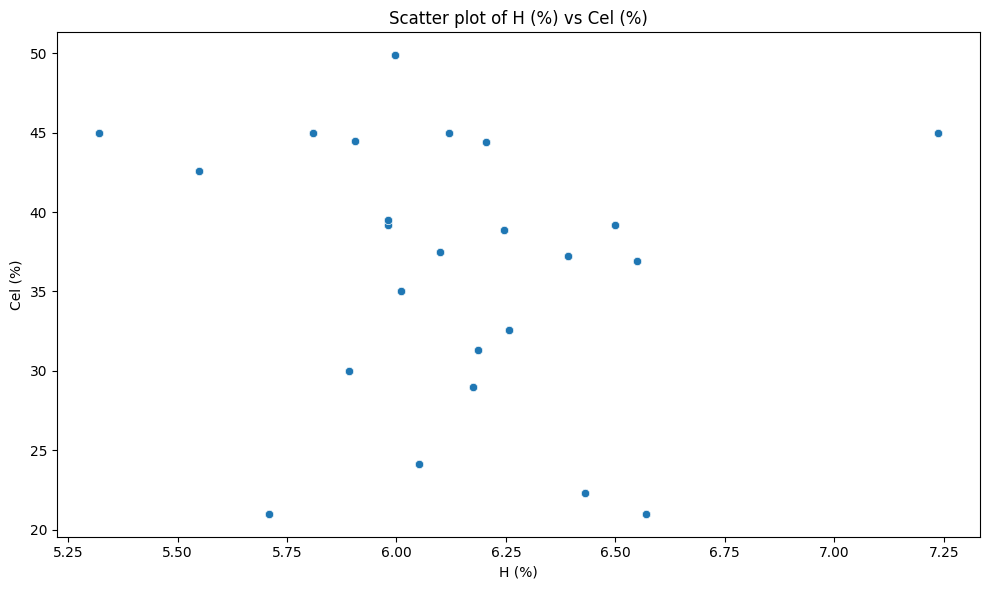

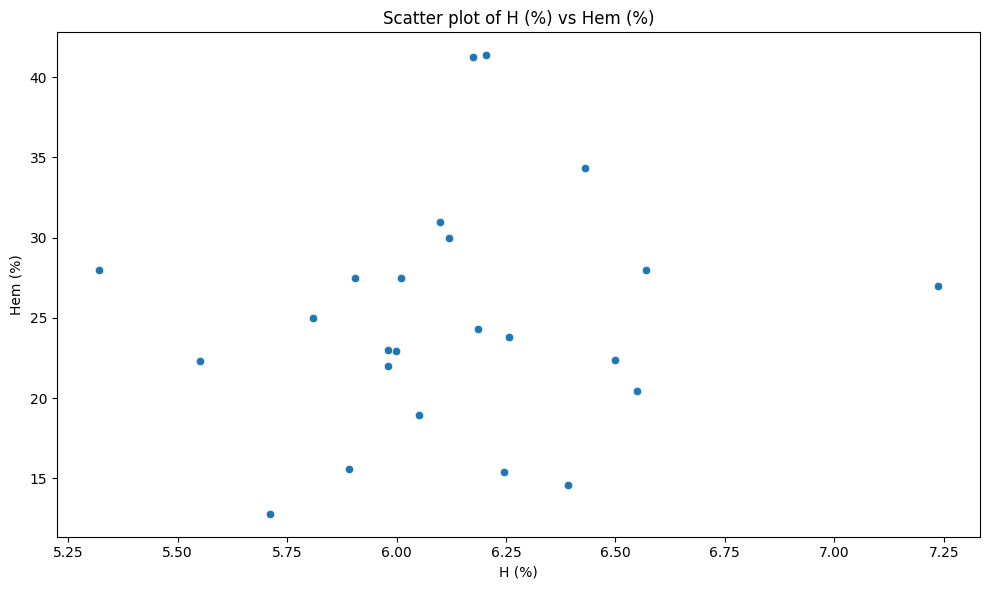

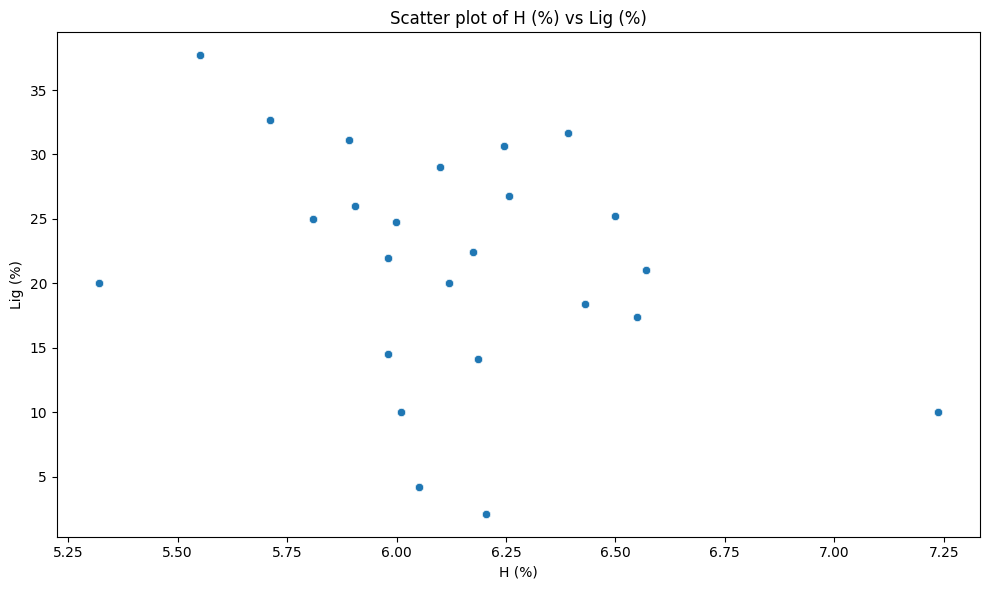

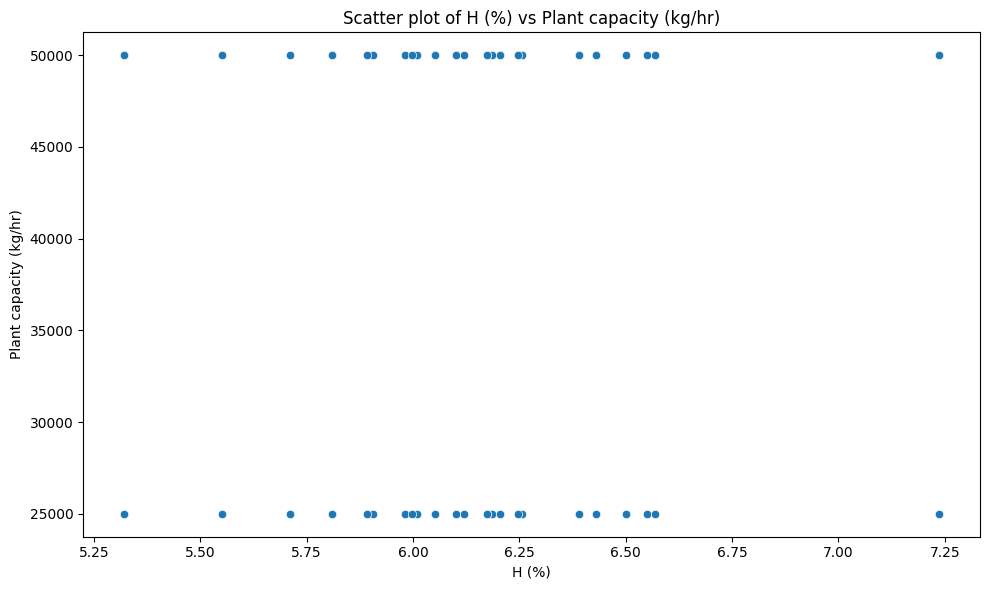

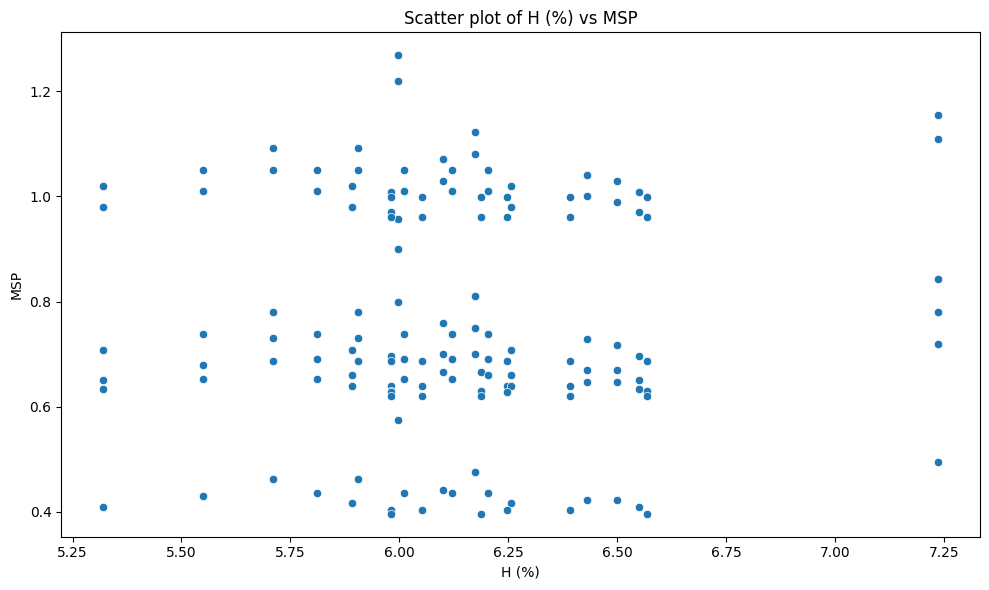

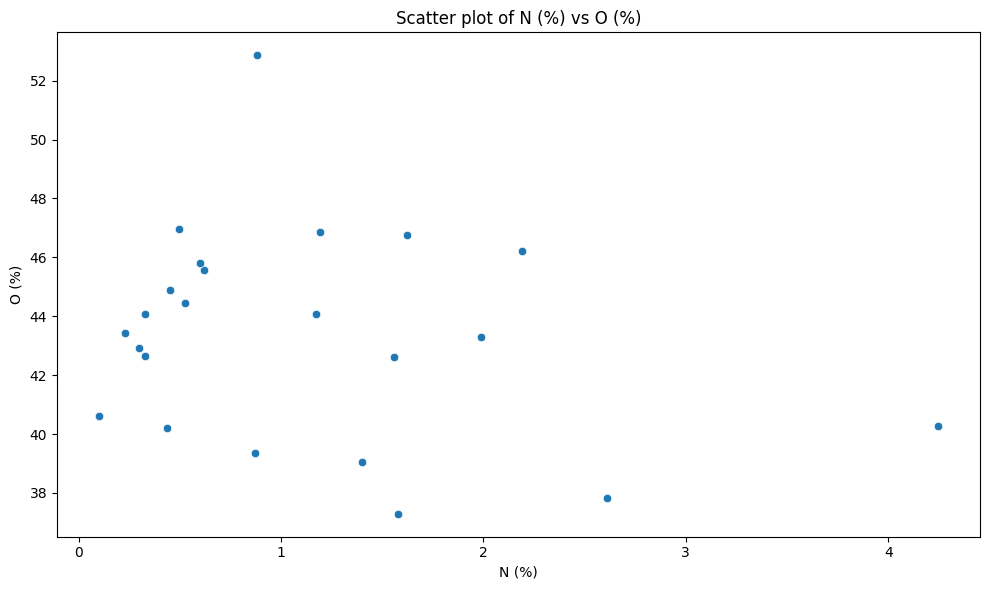

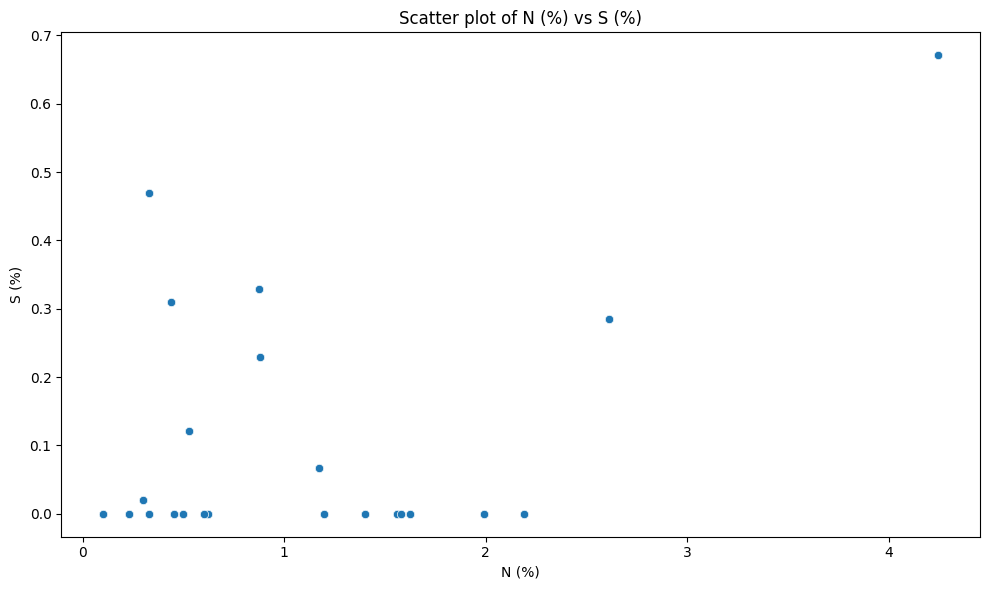

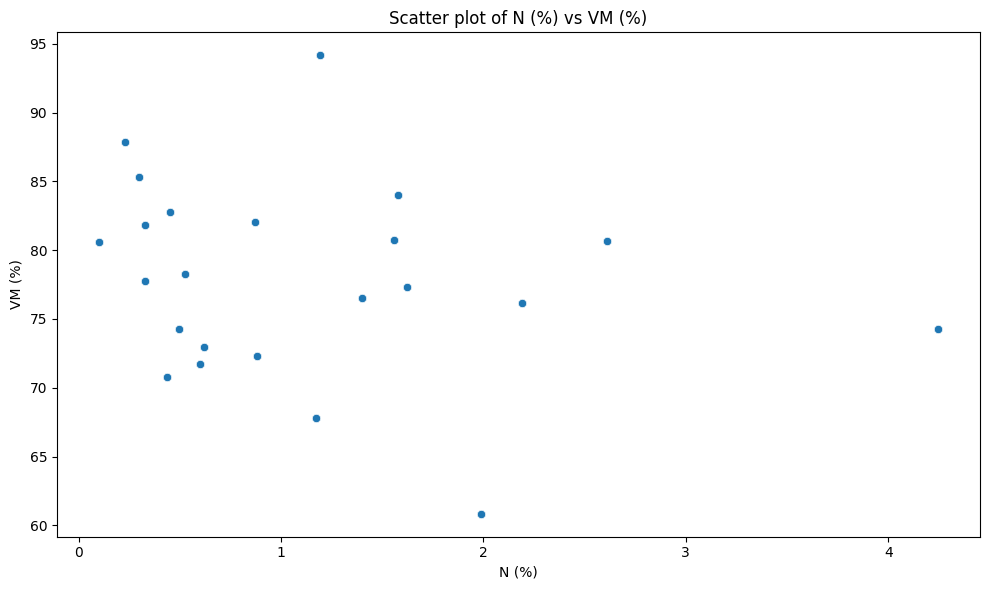

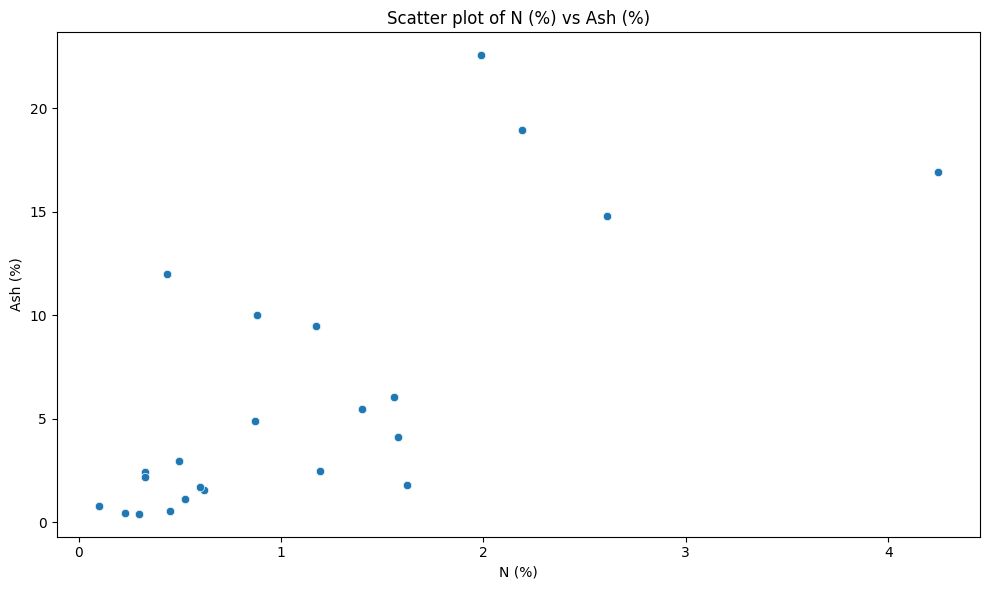

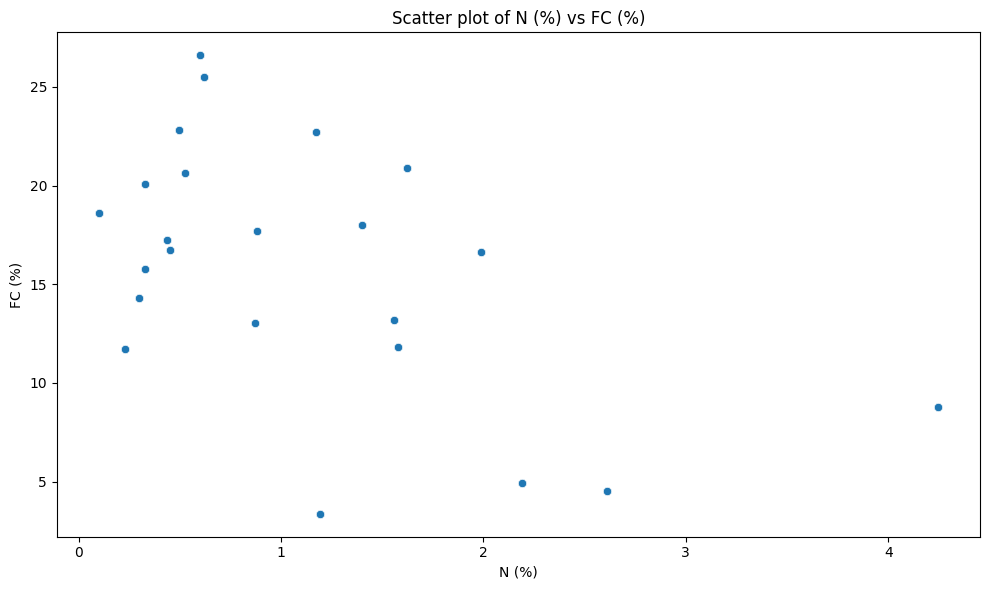

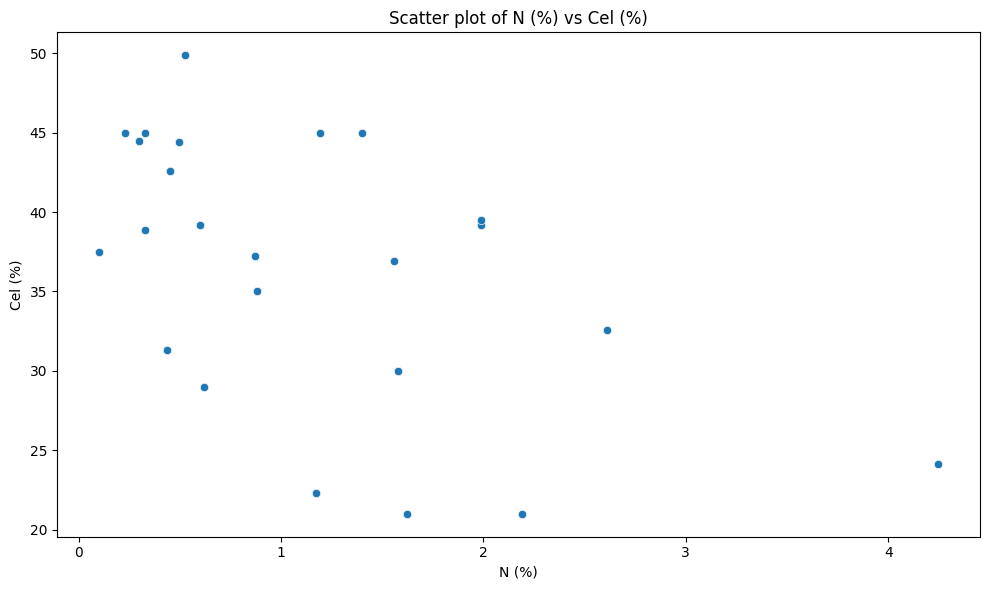

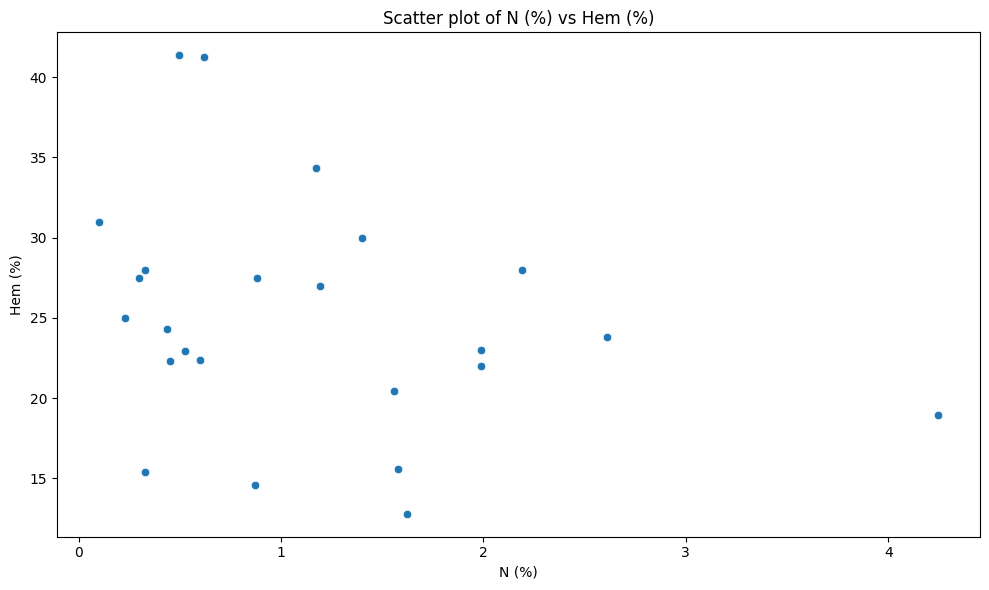

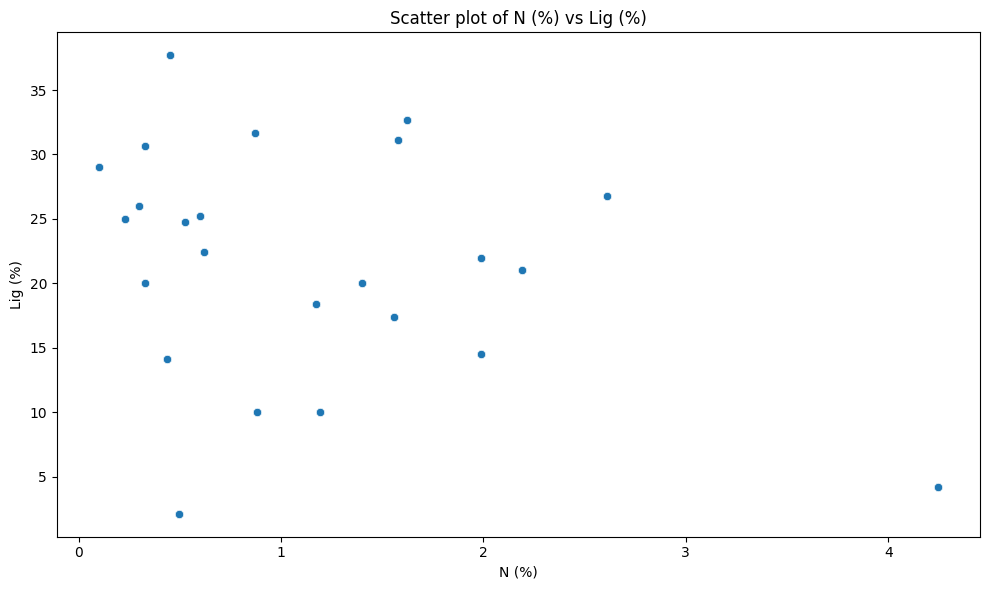

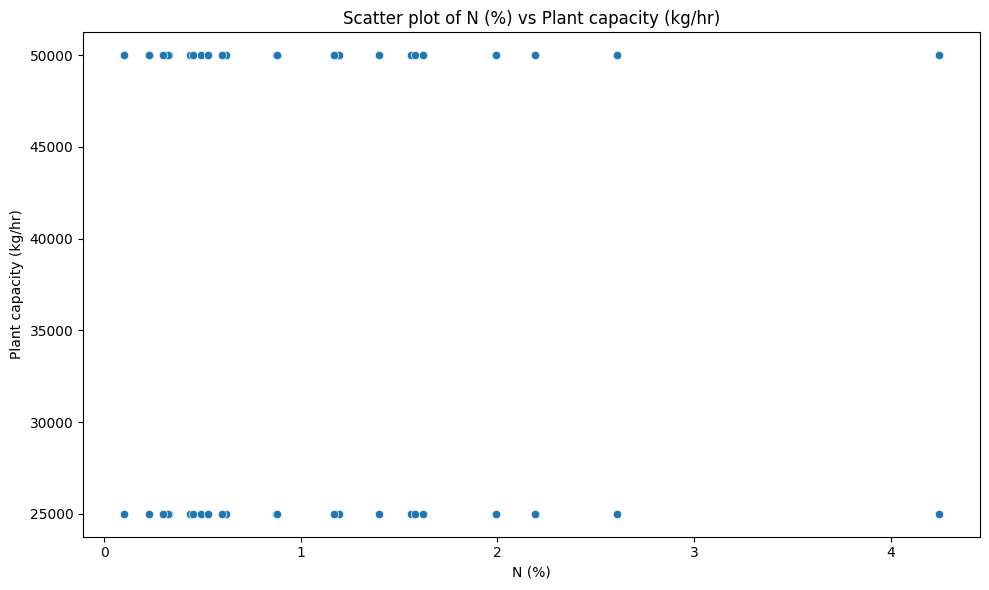

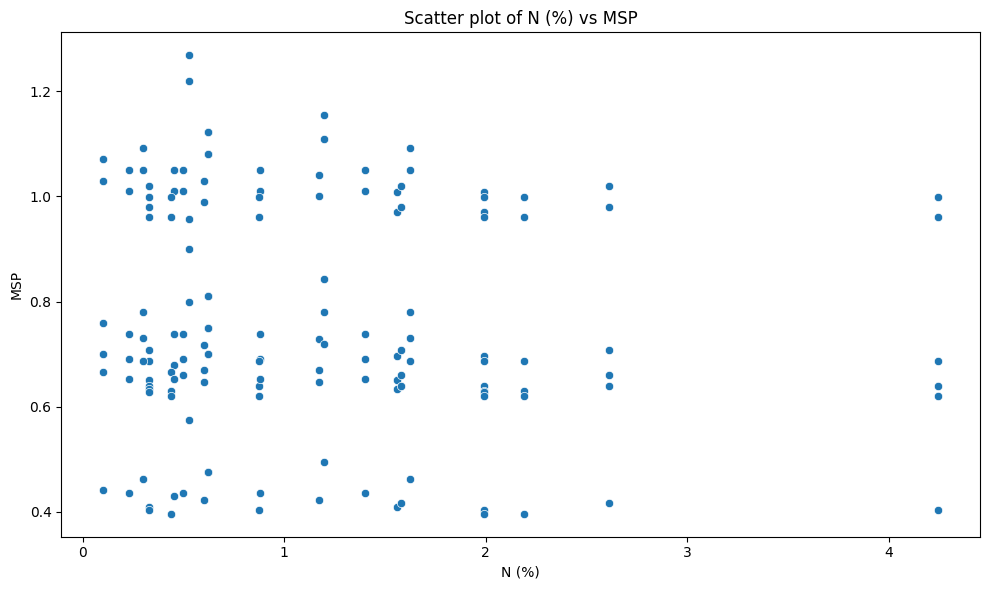

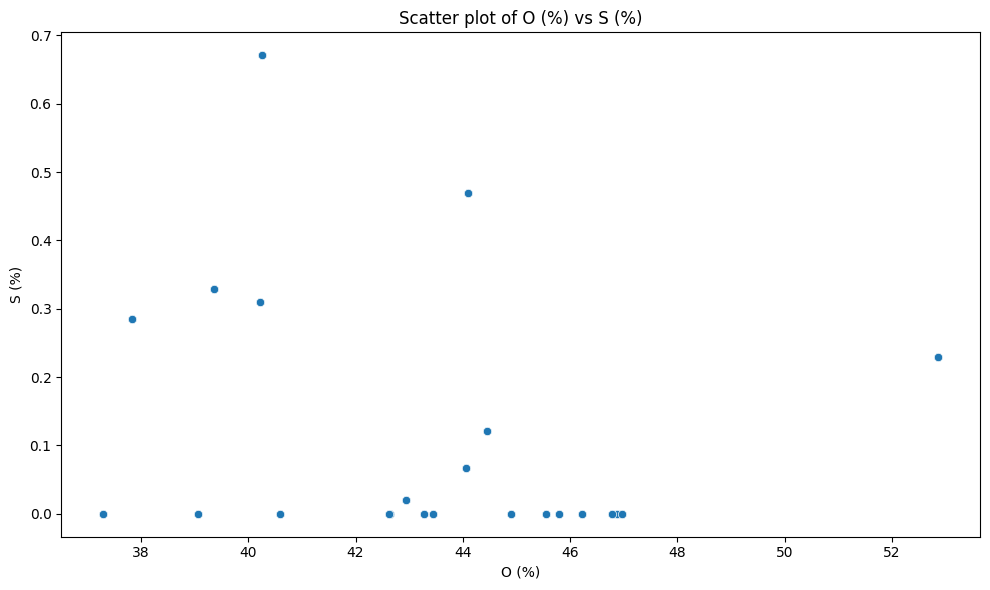

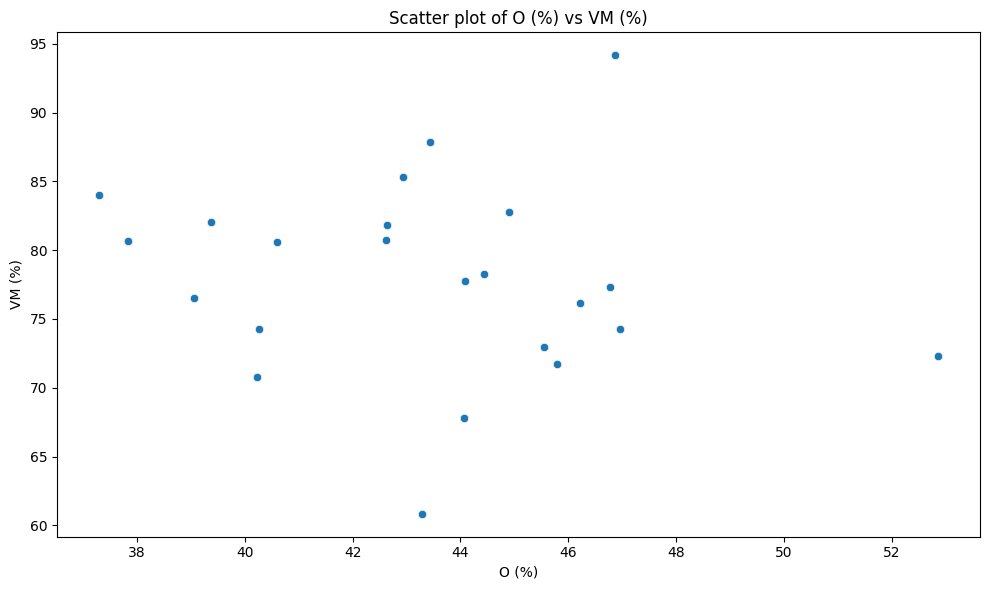

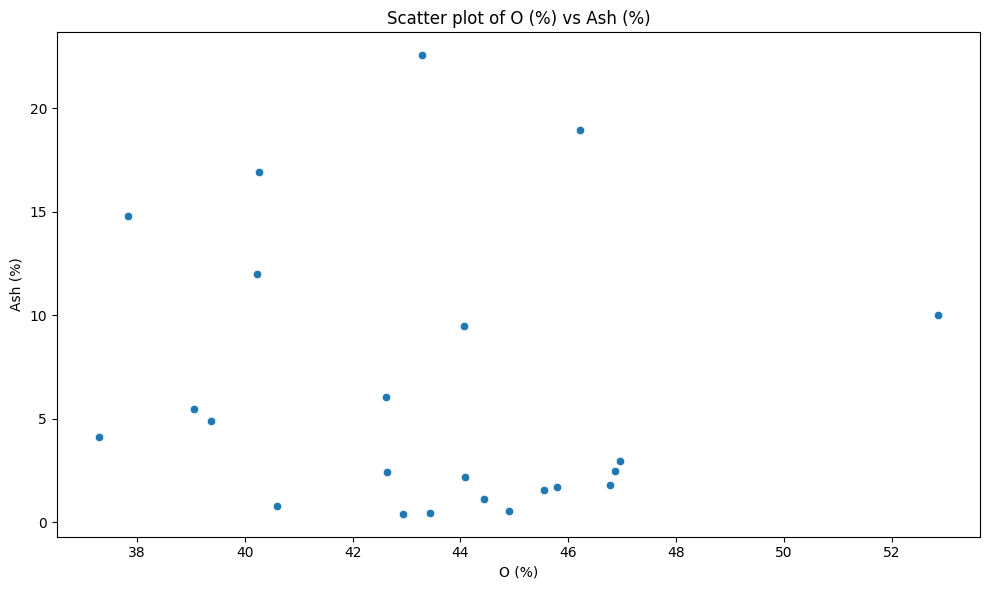

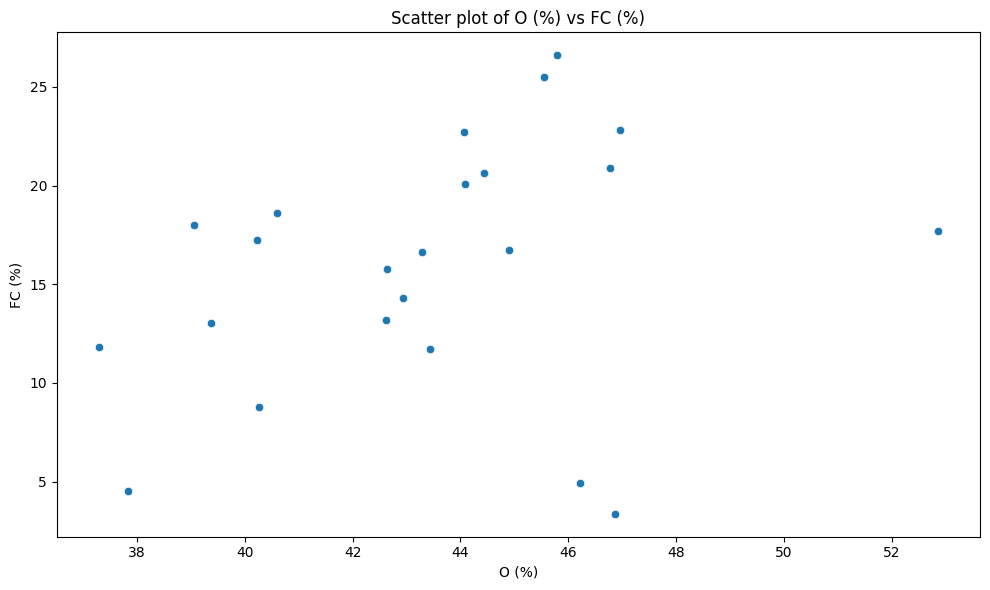

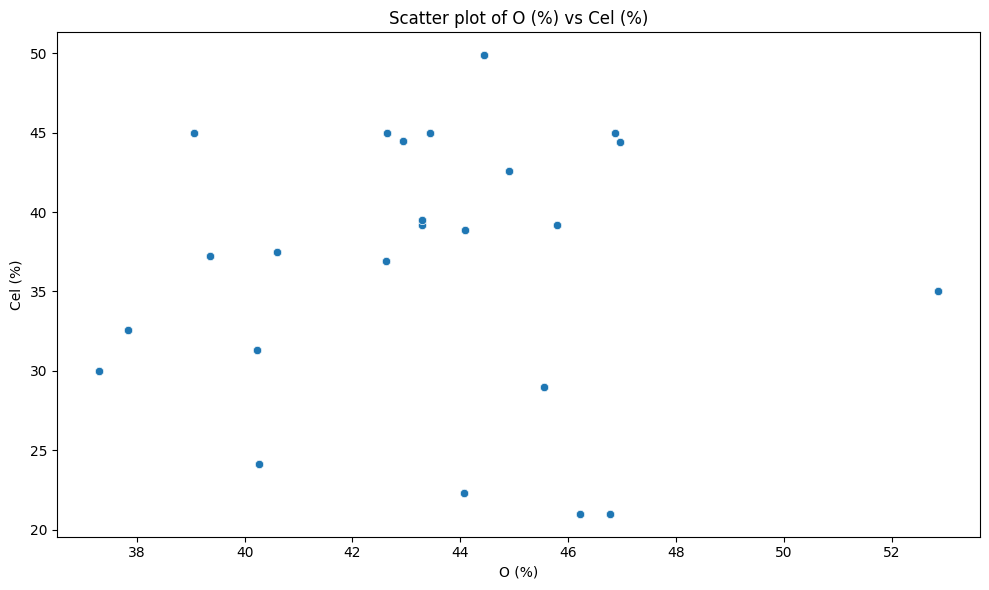

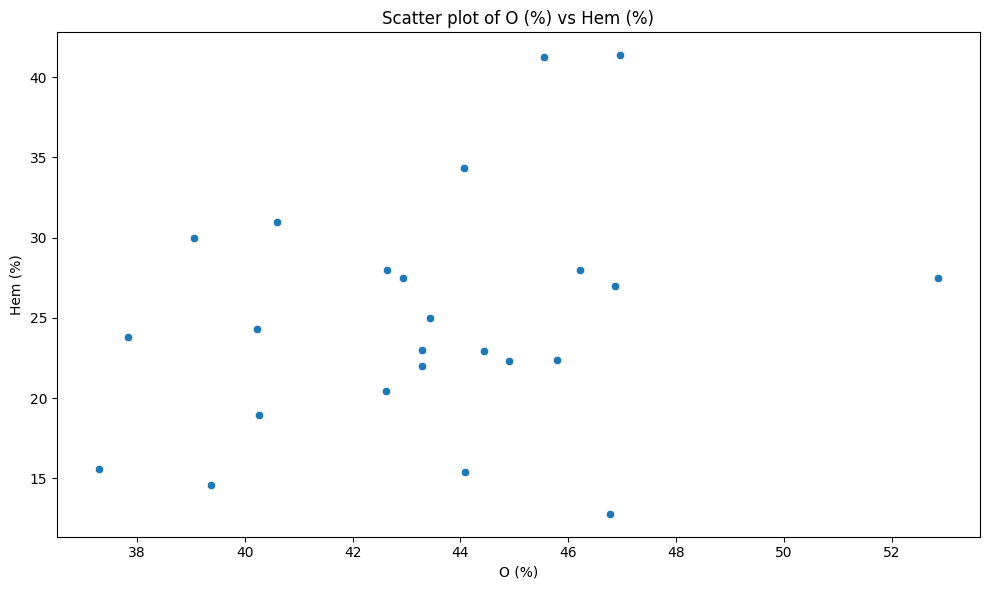

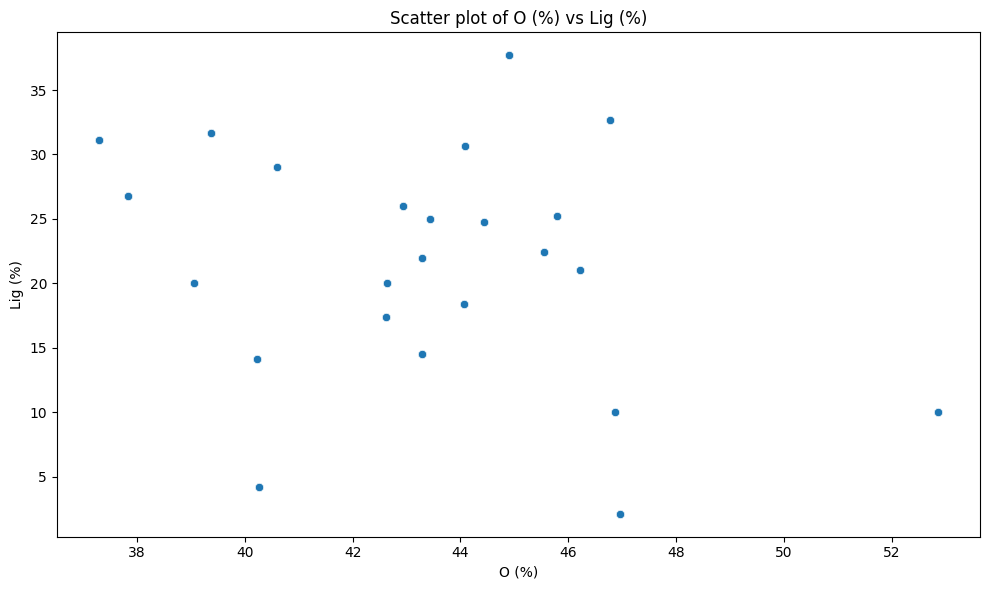

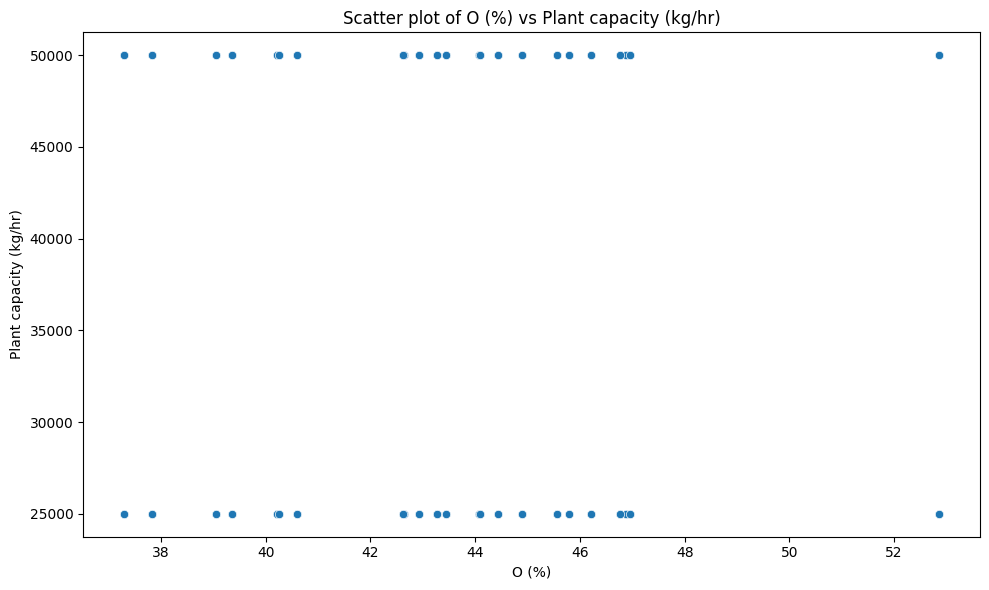

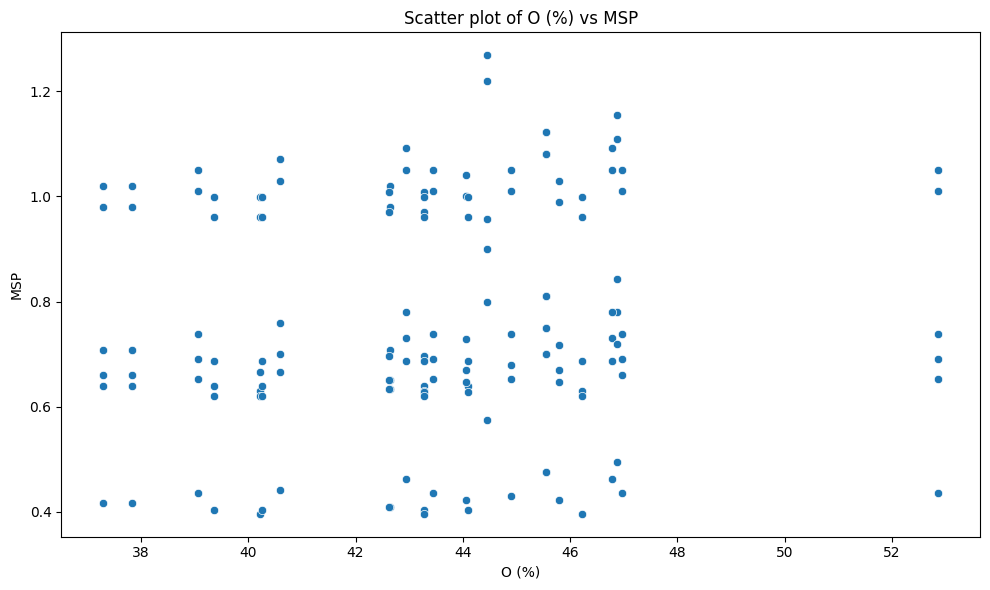

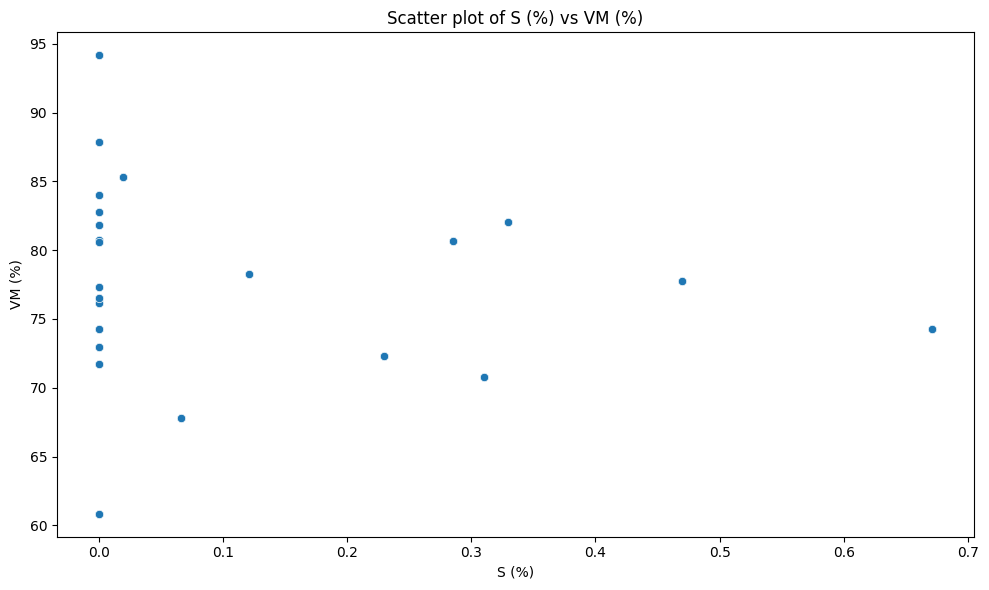

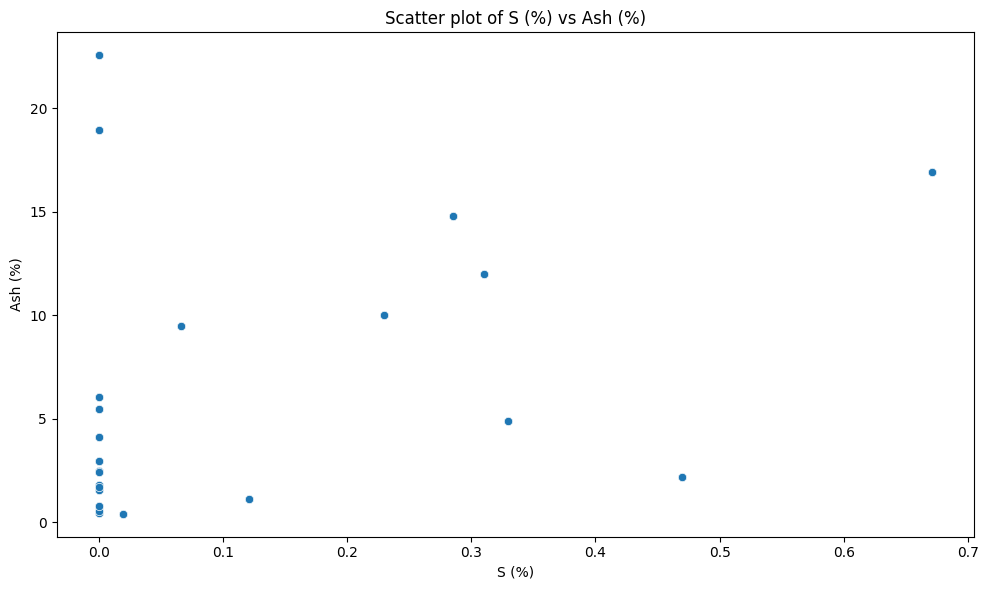

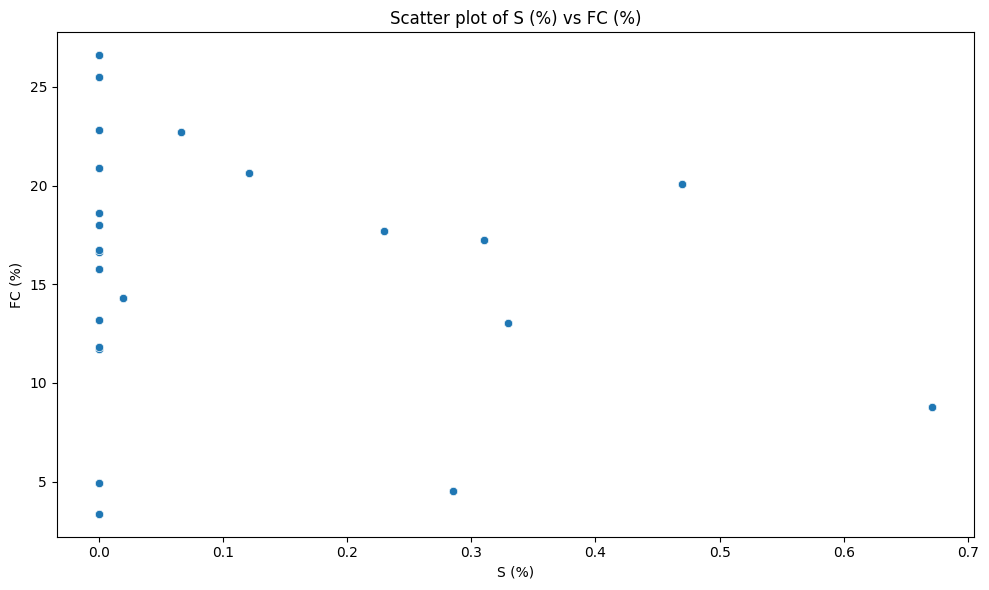

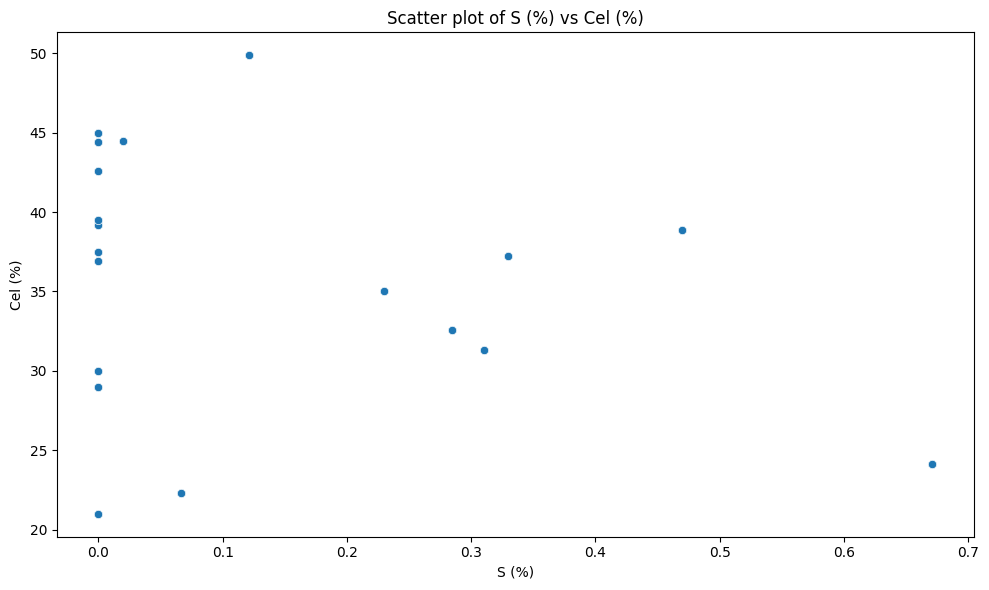

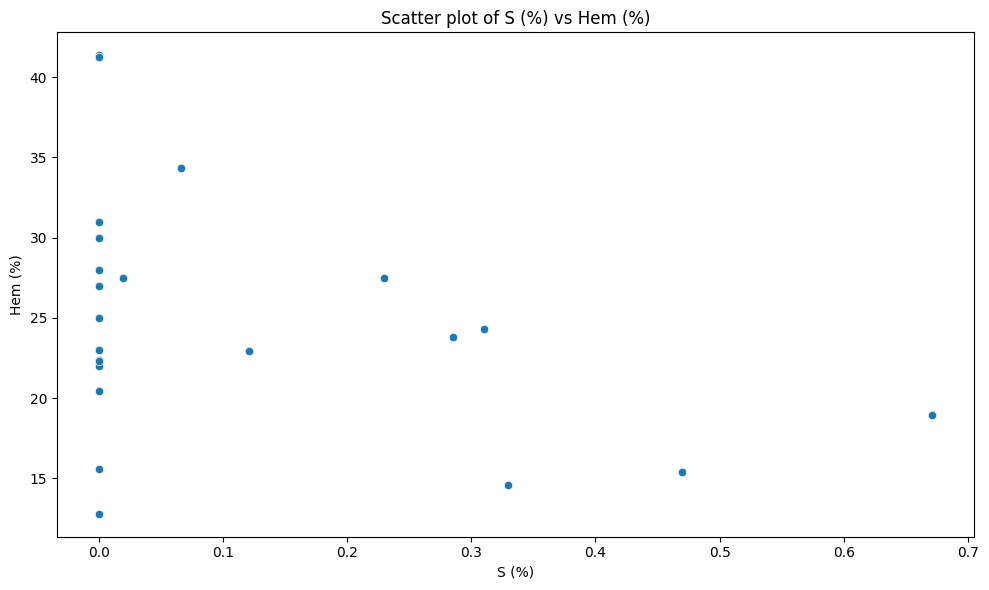

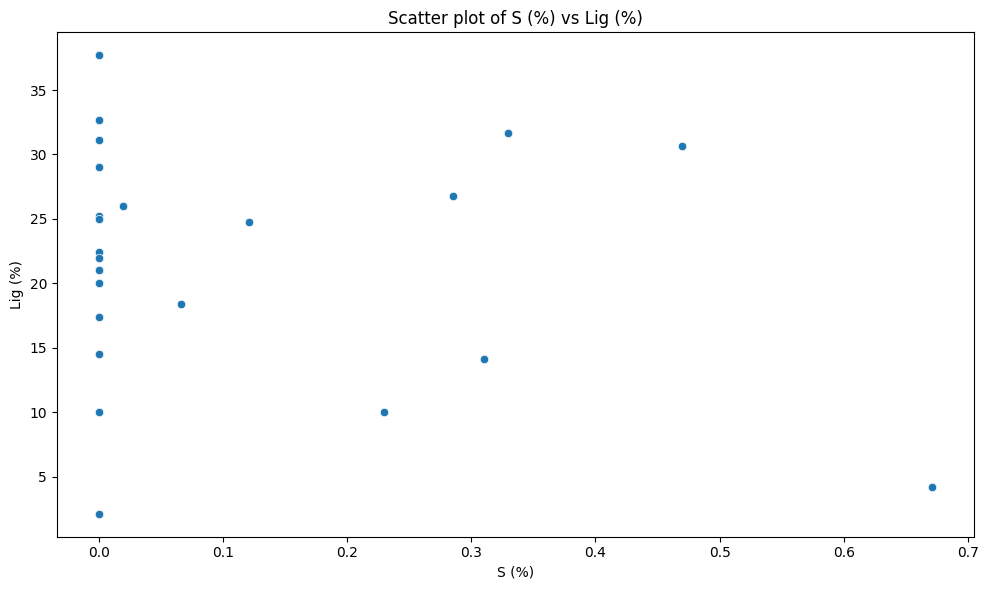

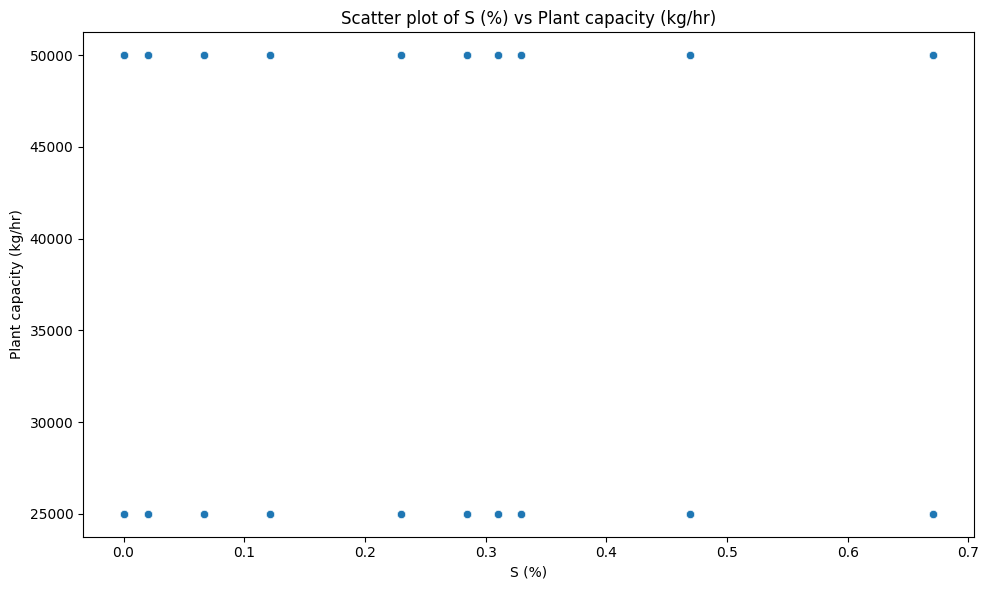

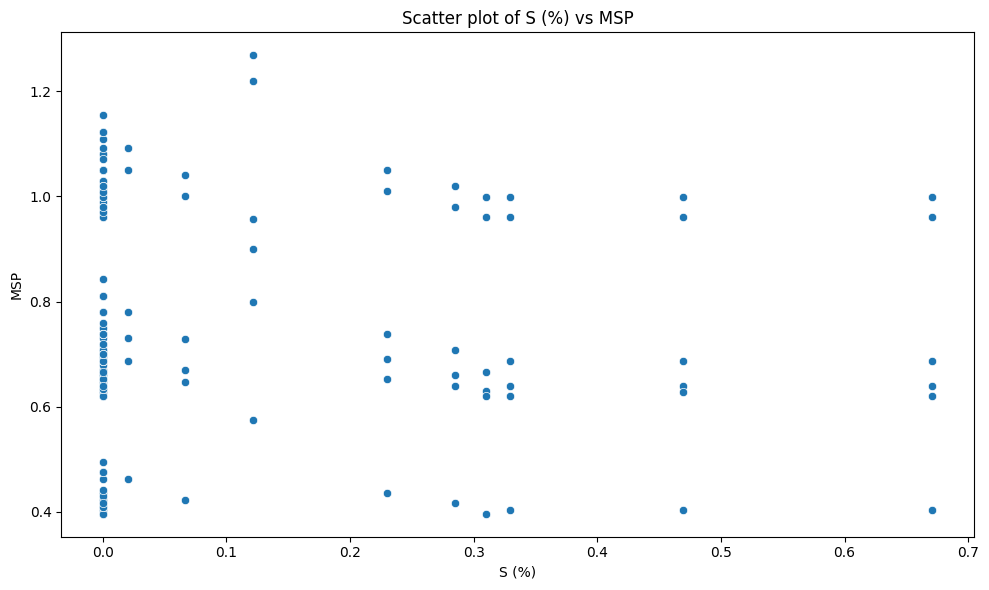

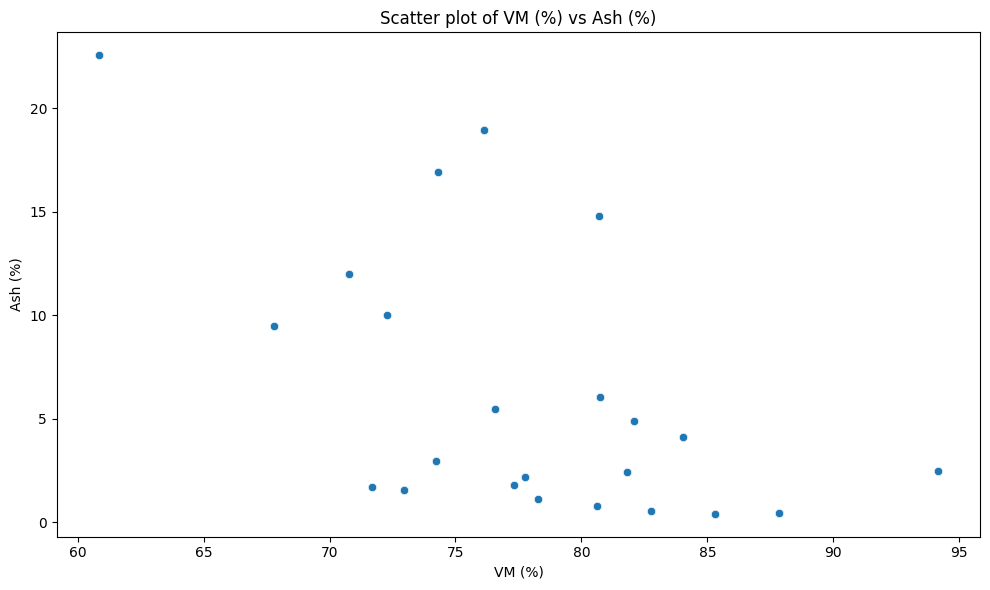

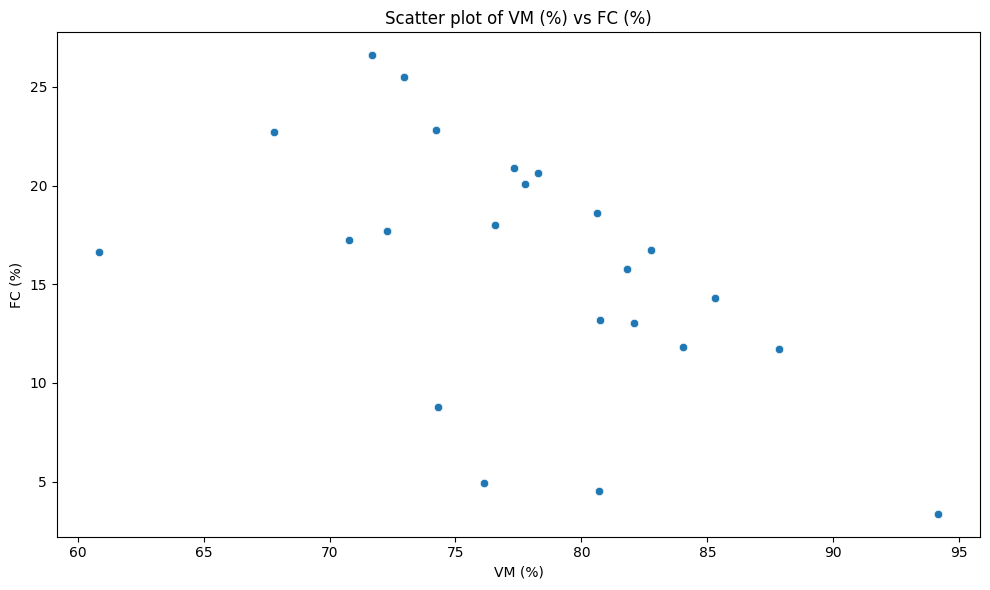

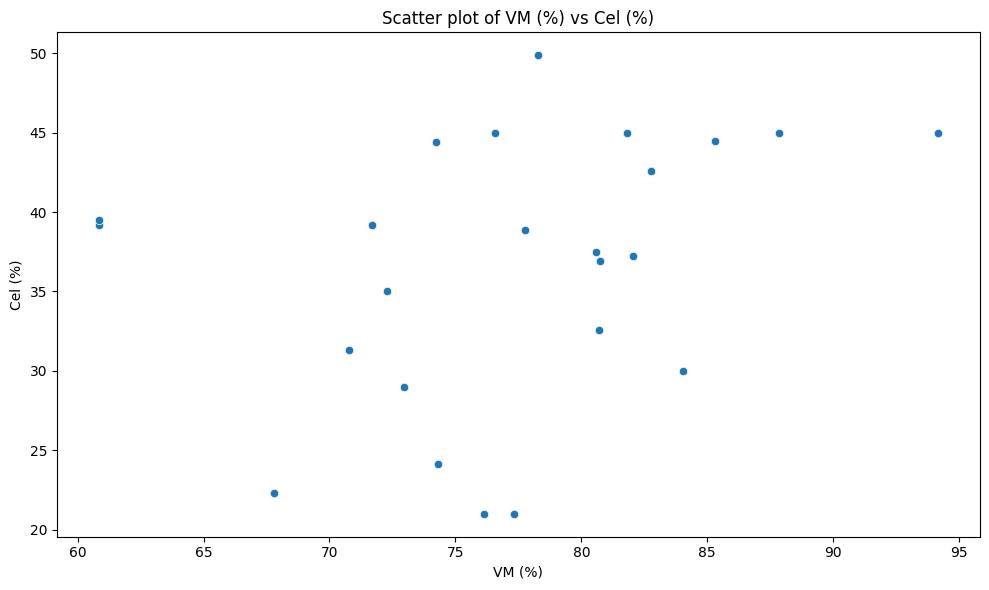

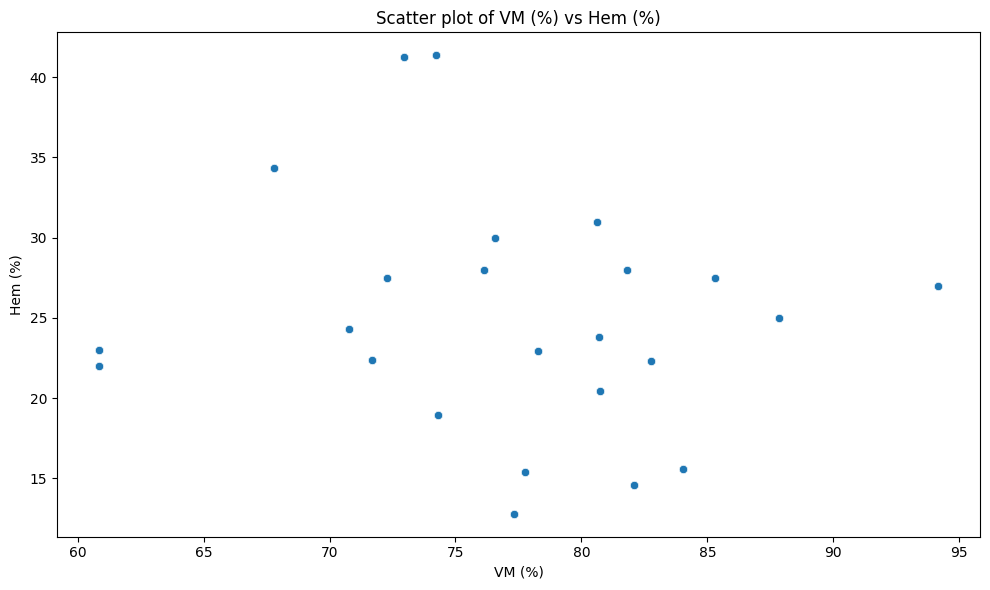

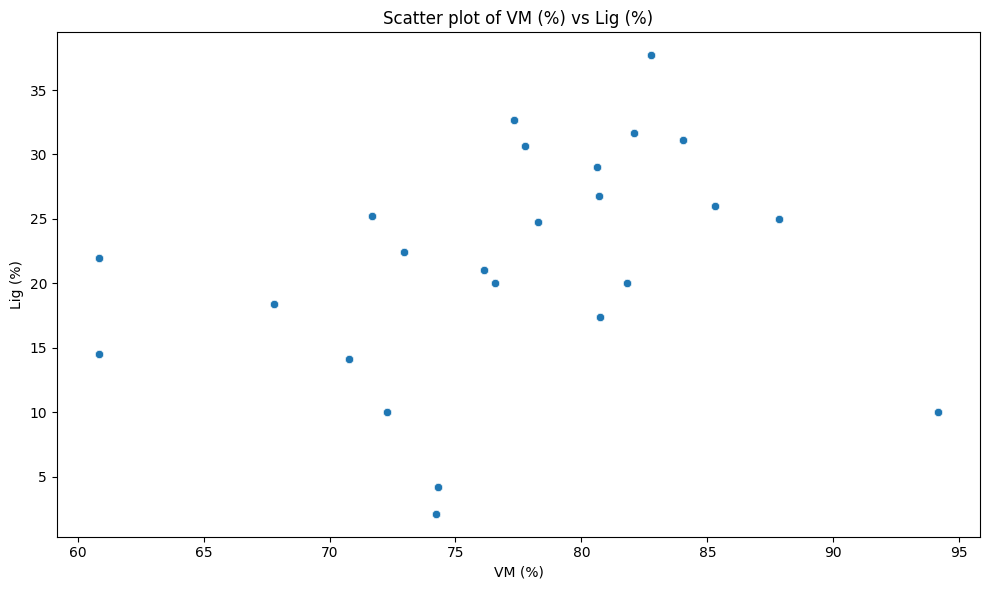

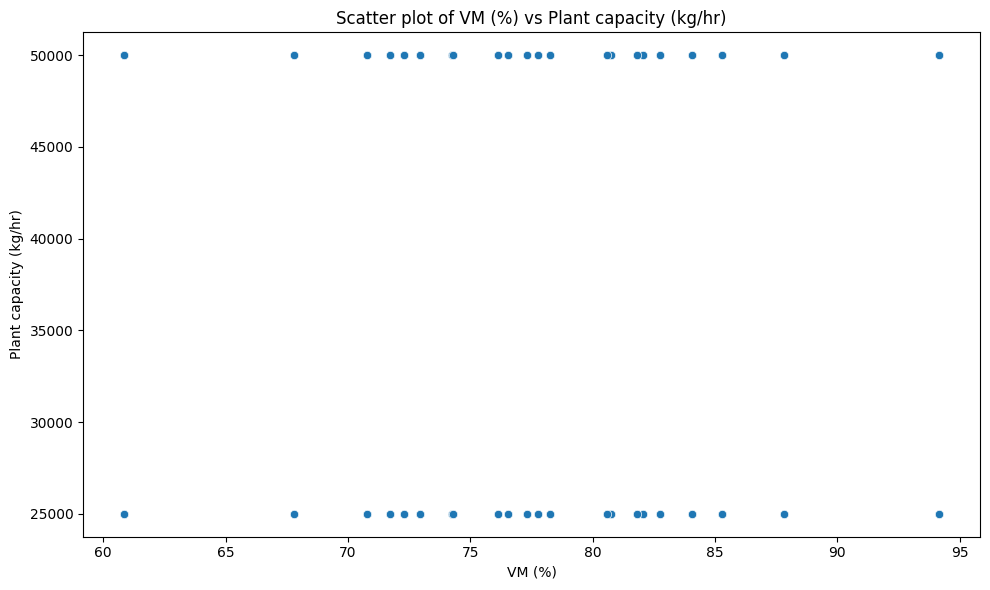

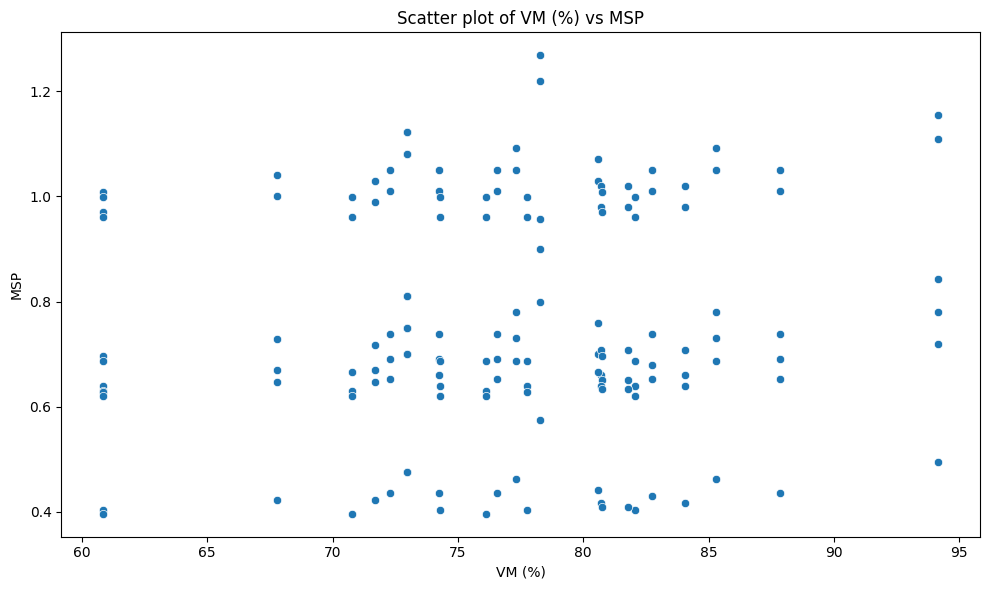

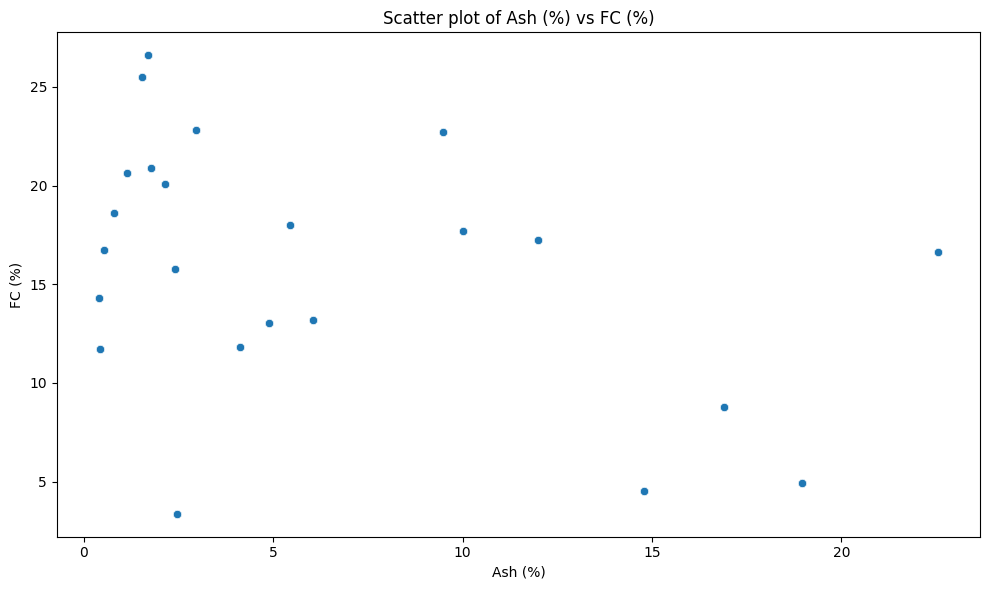

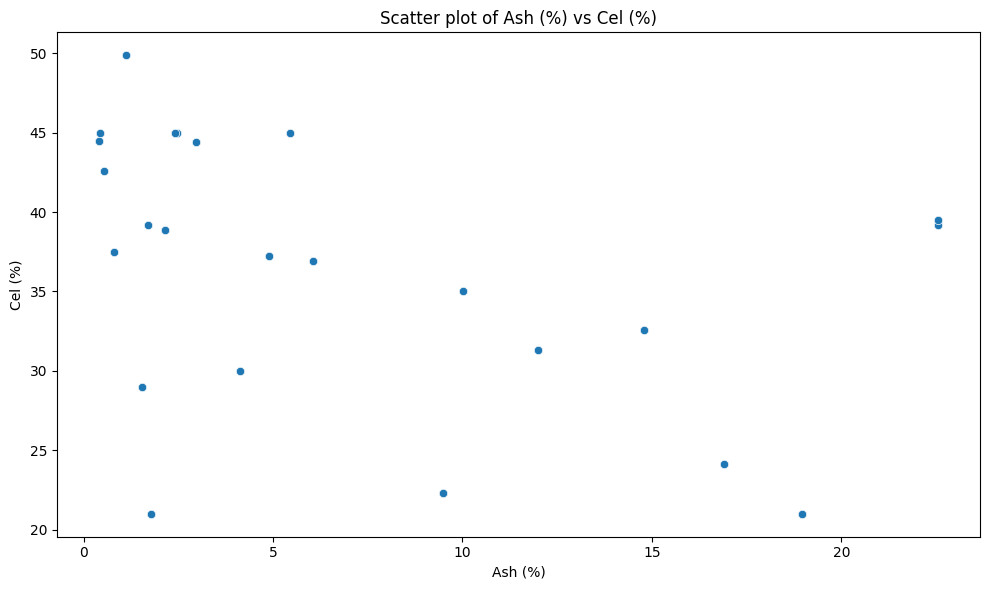

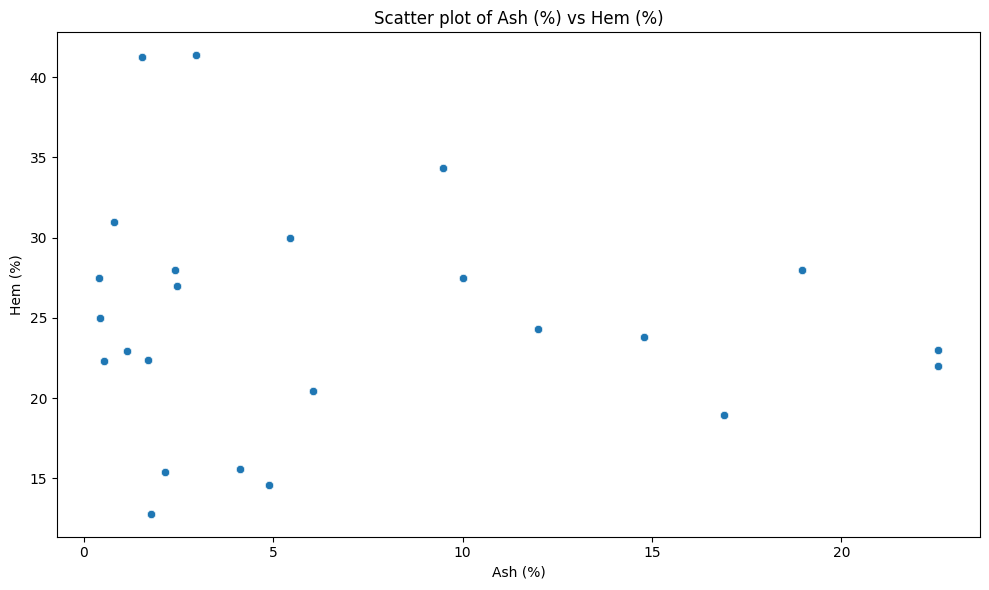

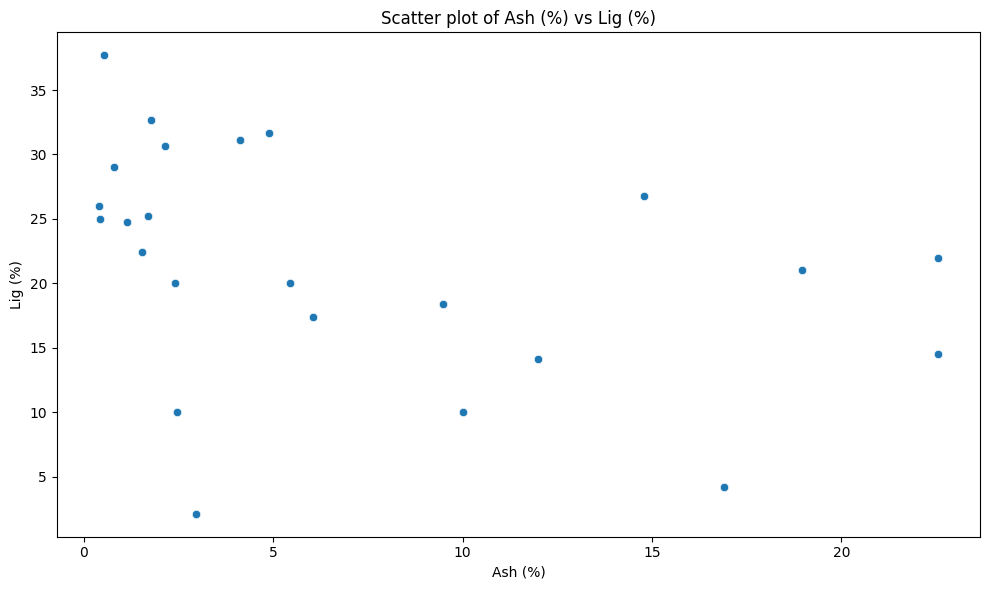

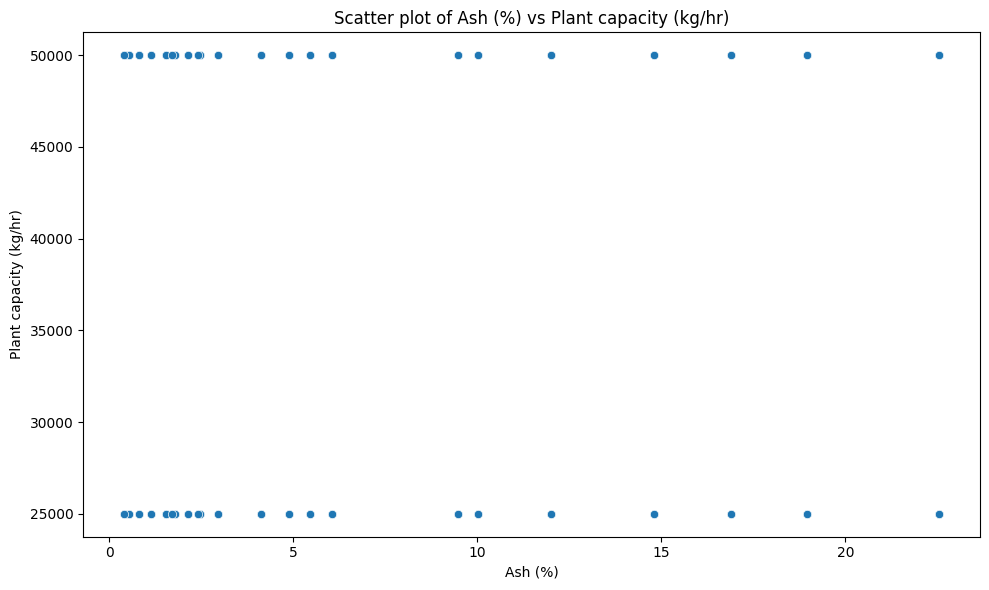

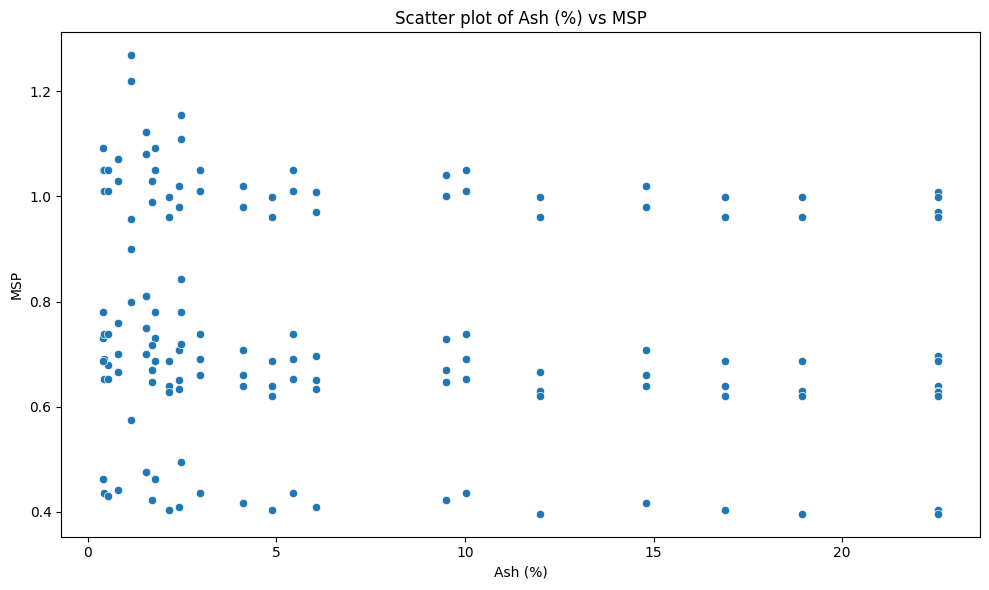

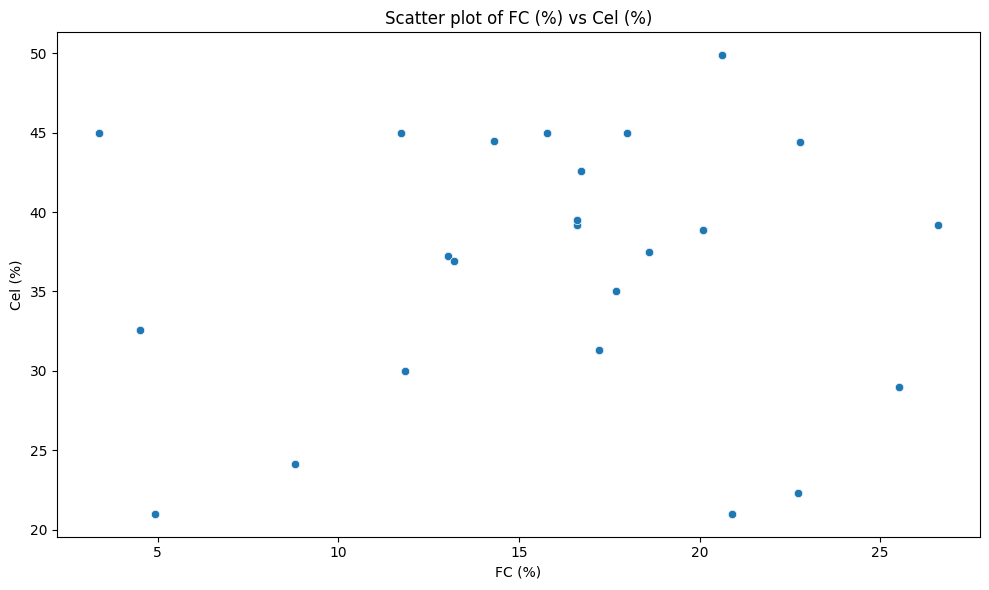

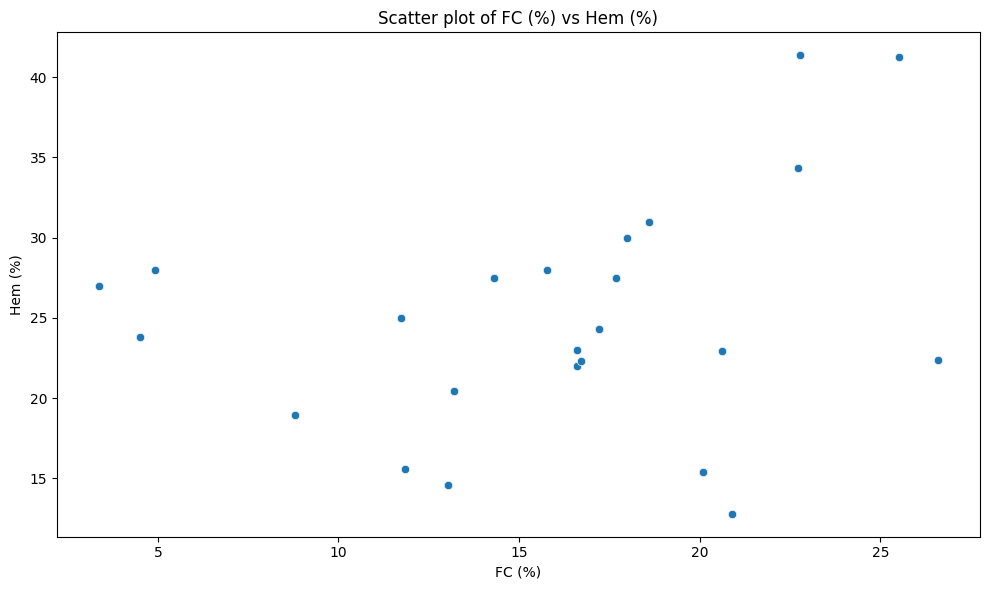

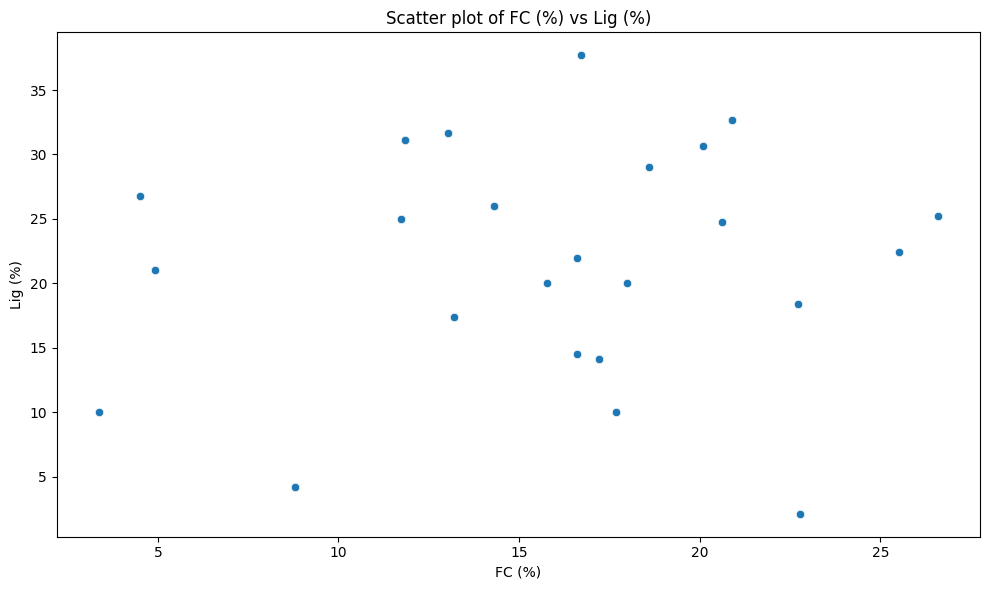

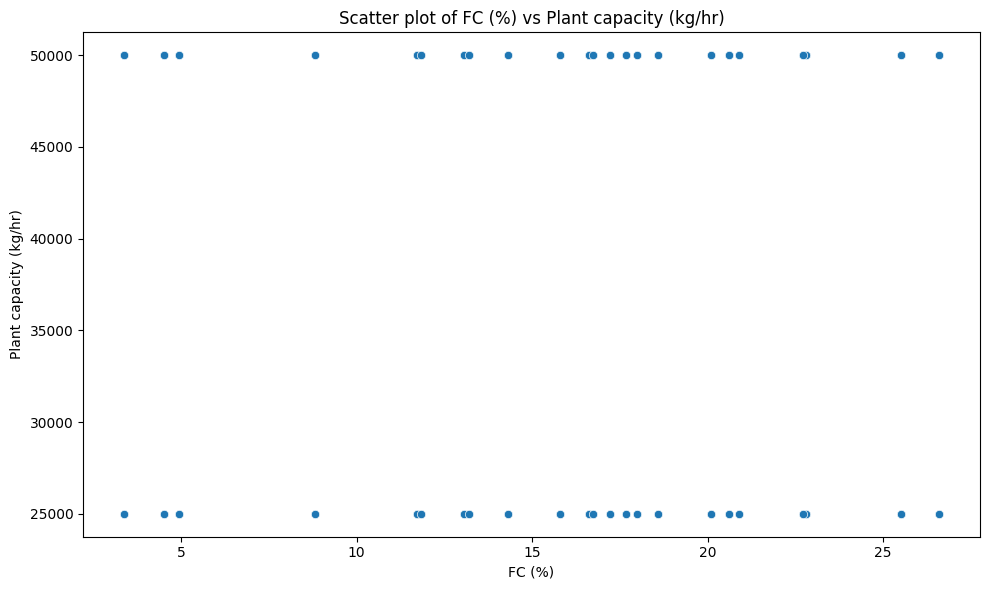

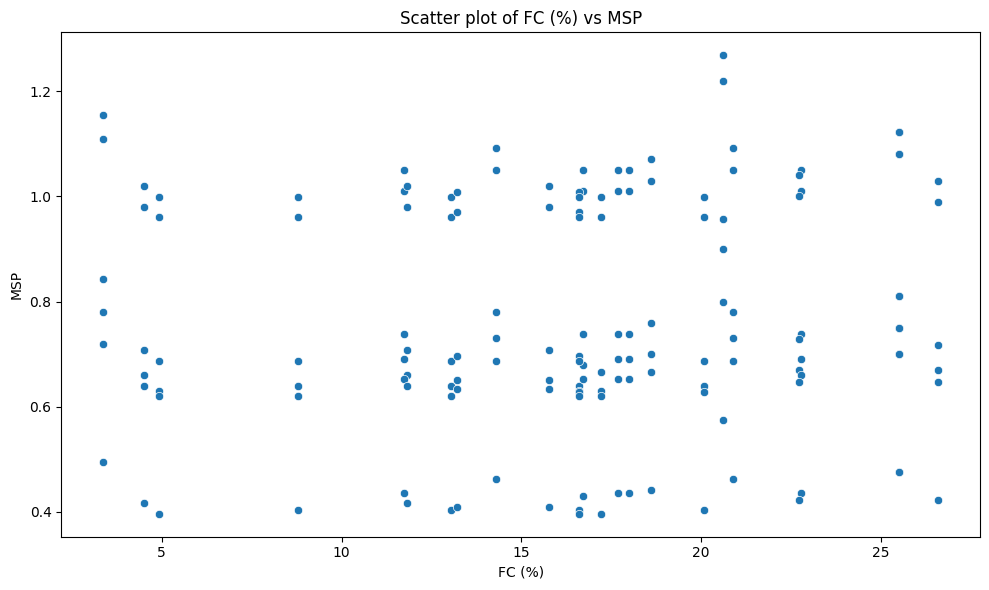

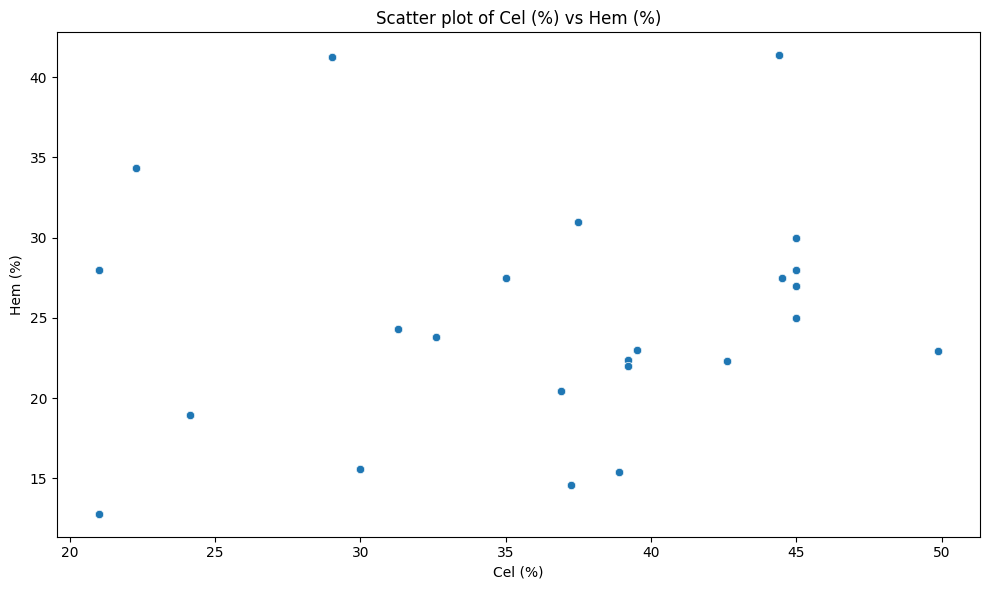

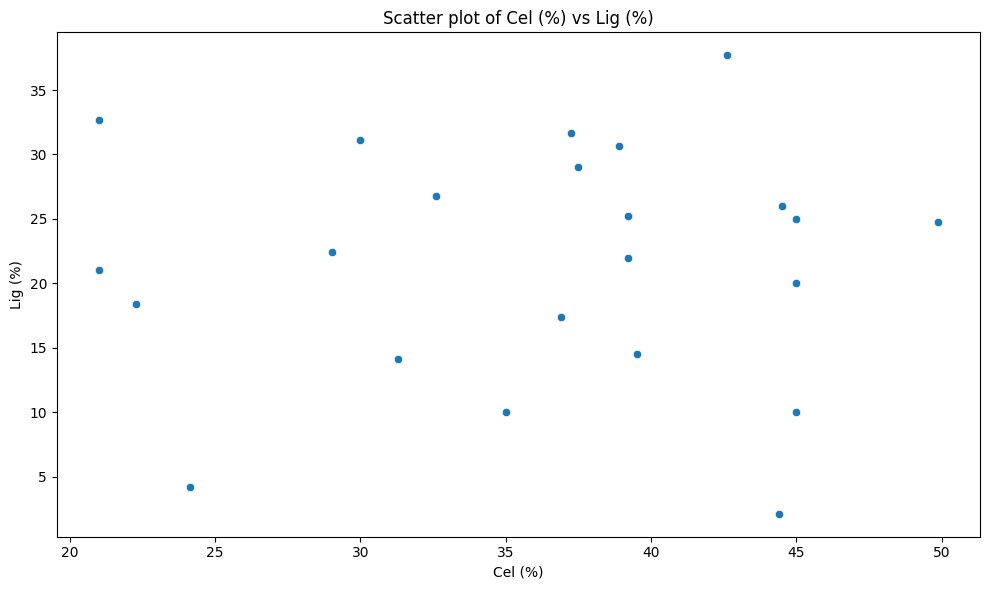

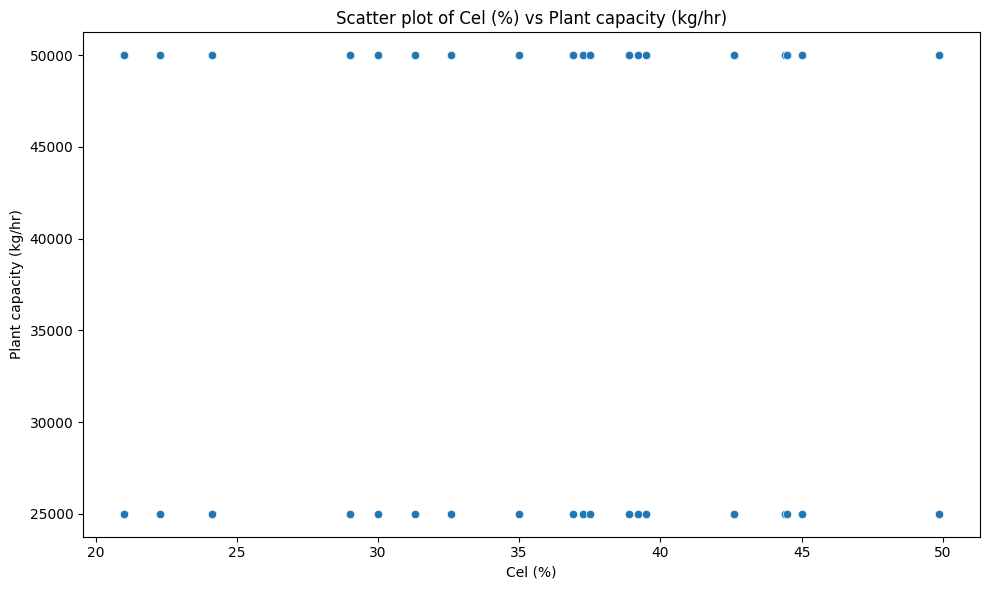

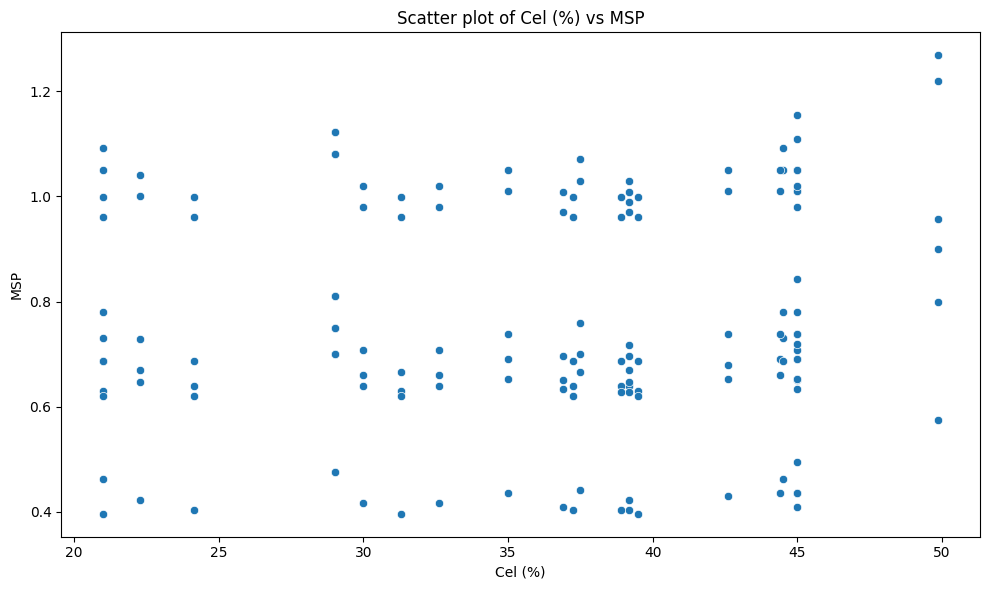

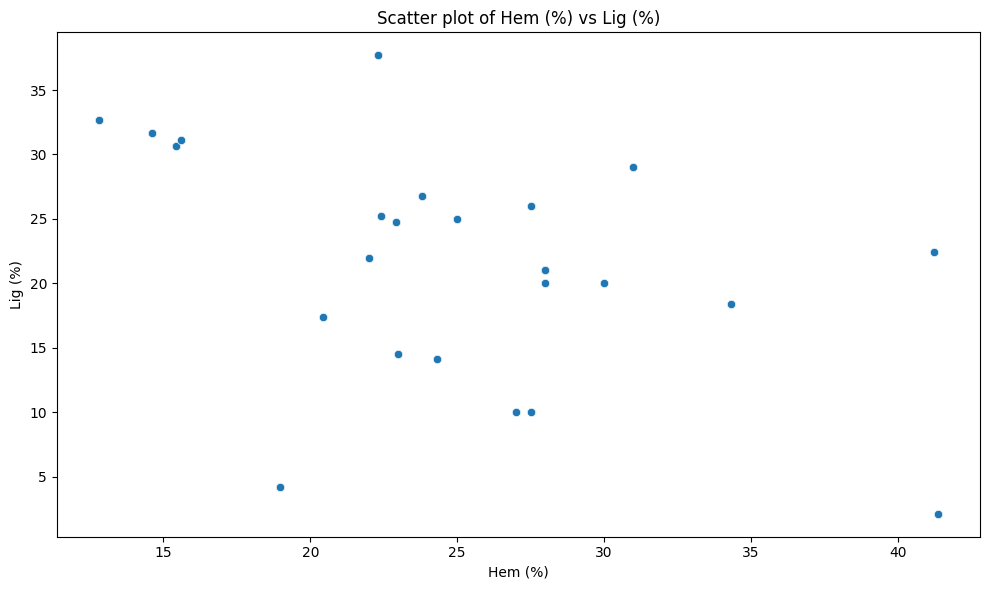

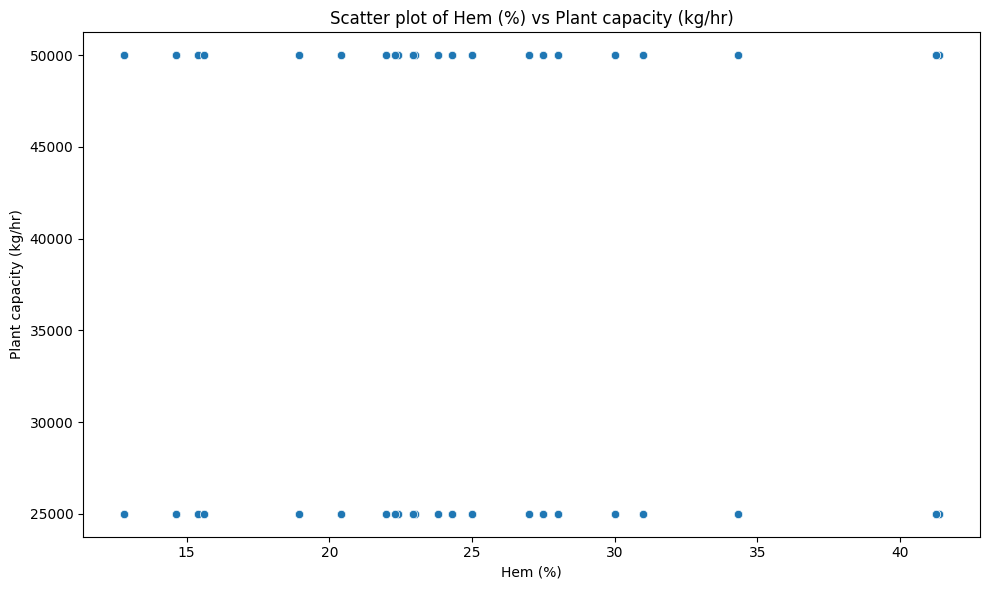

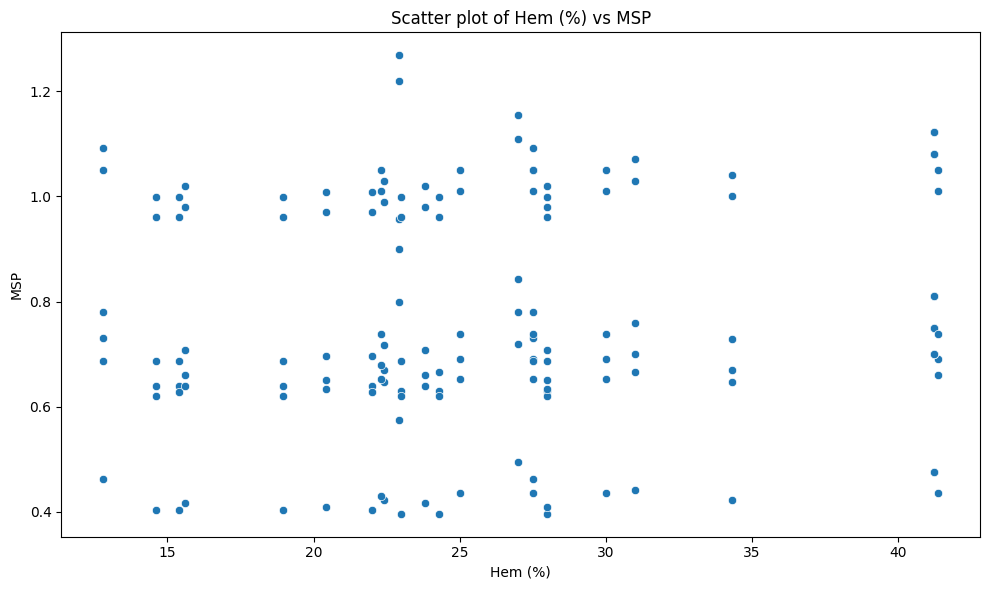

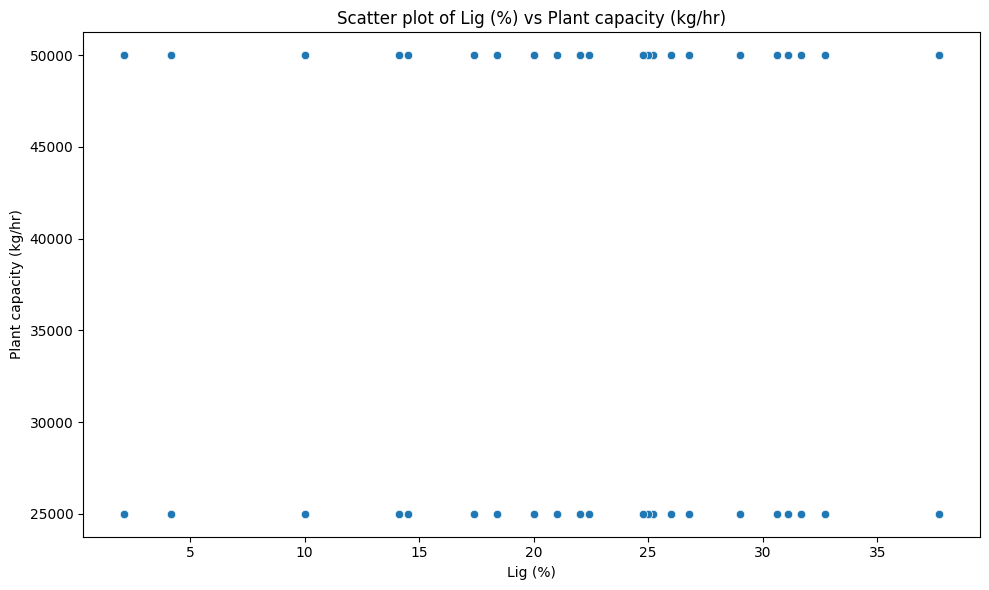

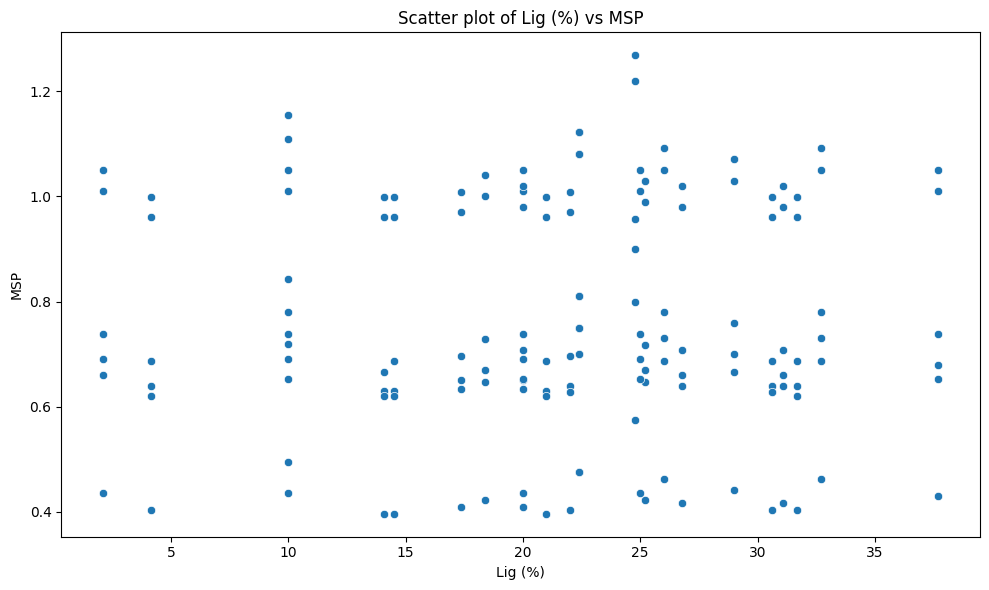

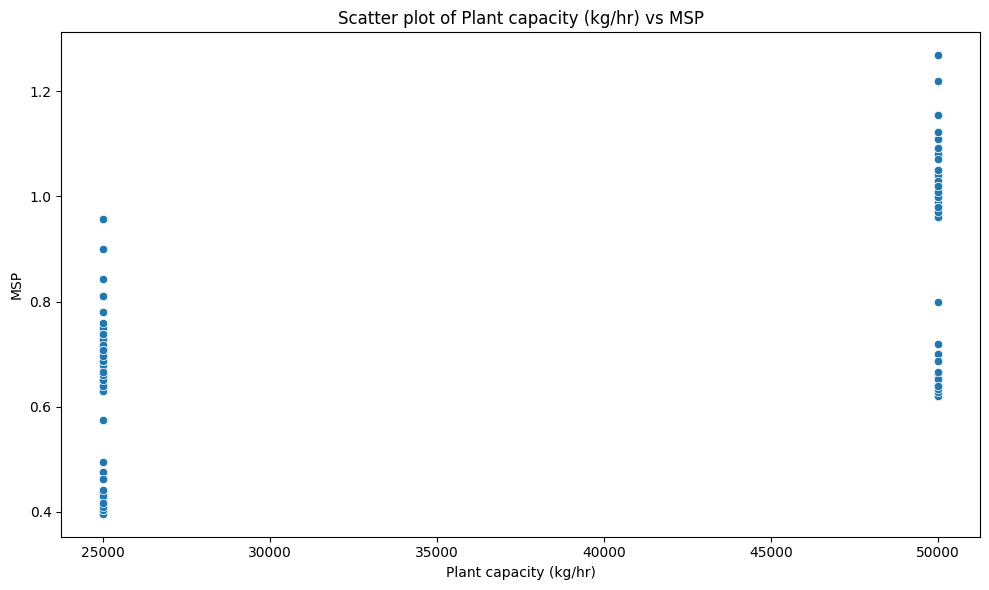

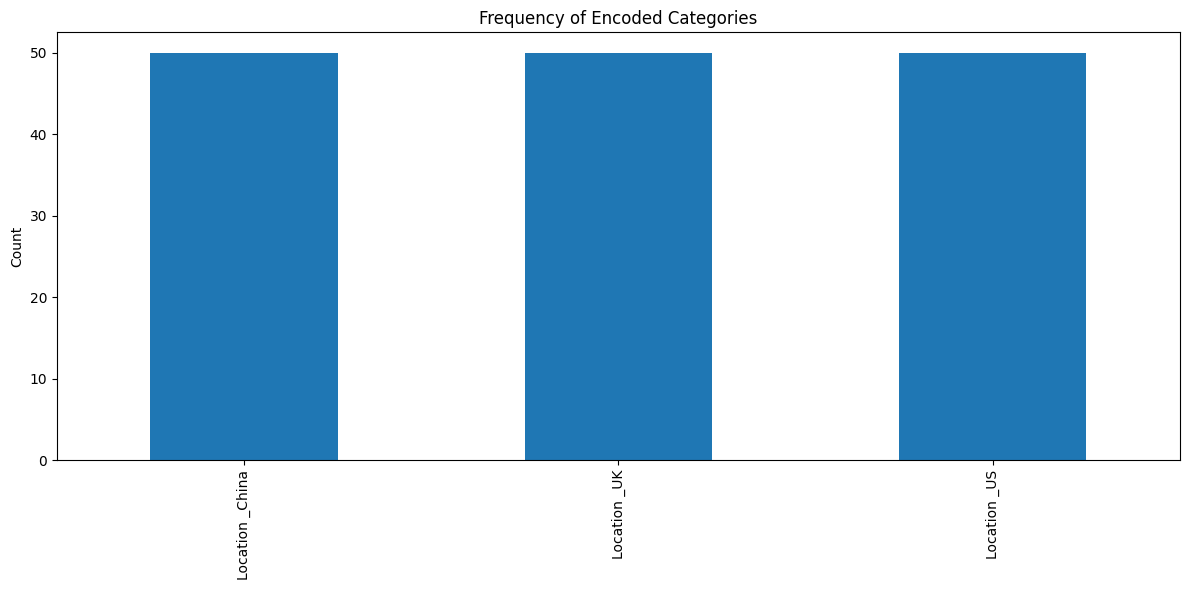

<Figure size 1200x1000 with 0 Axes>

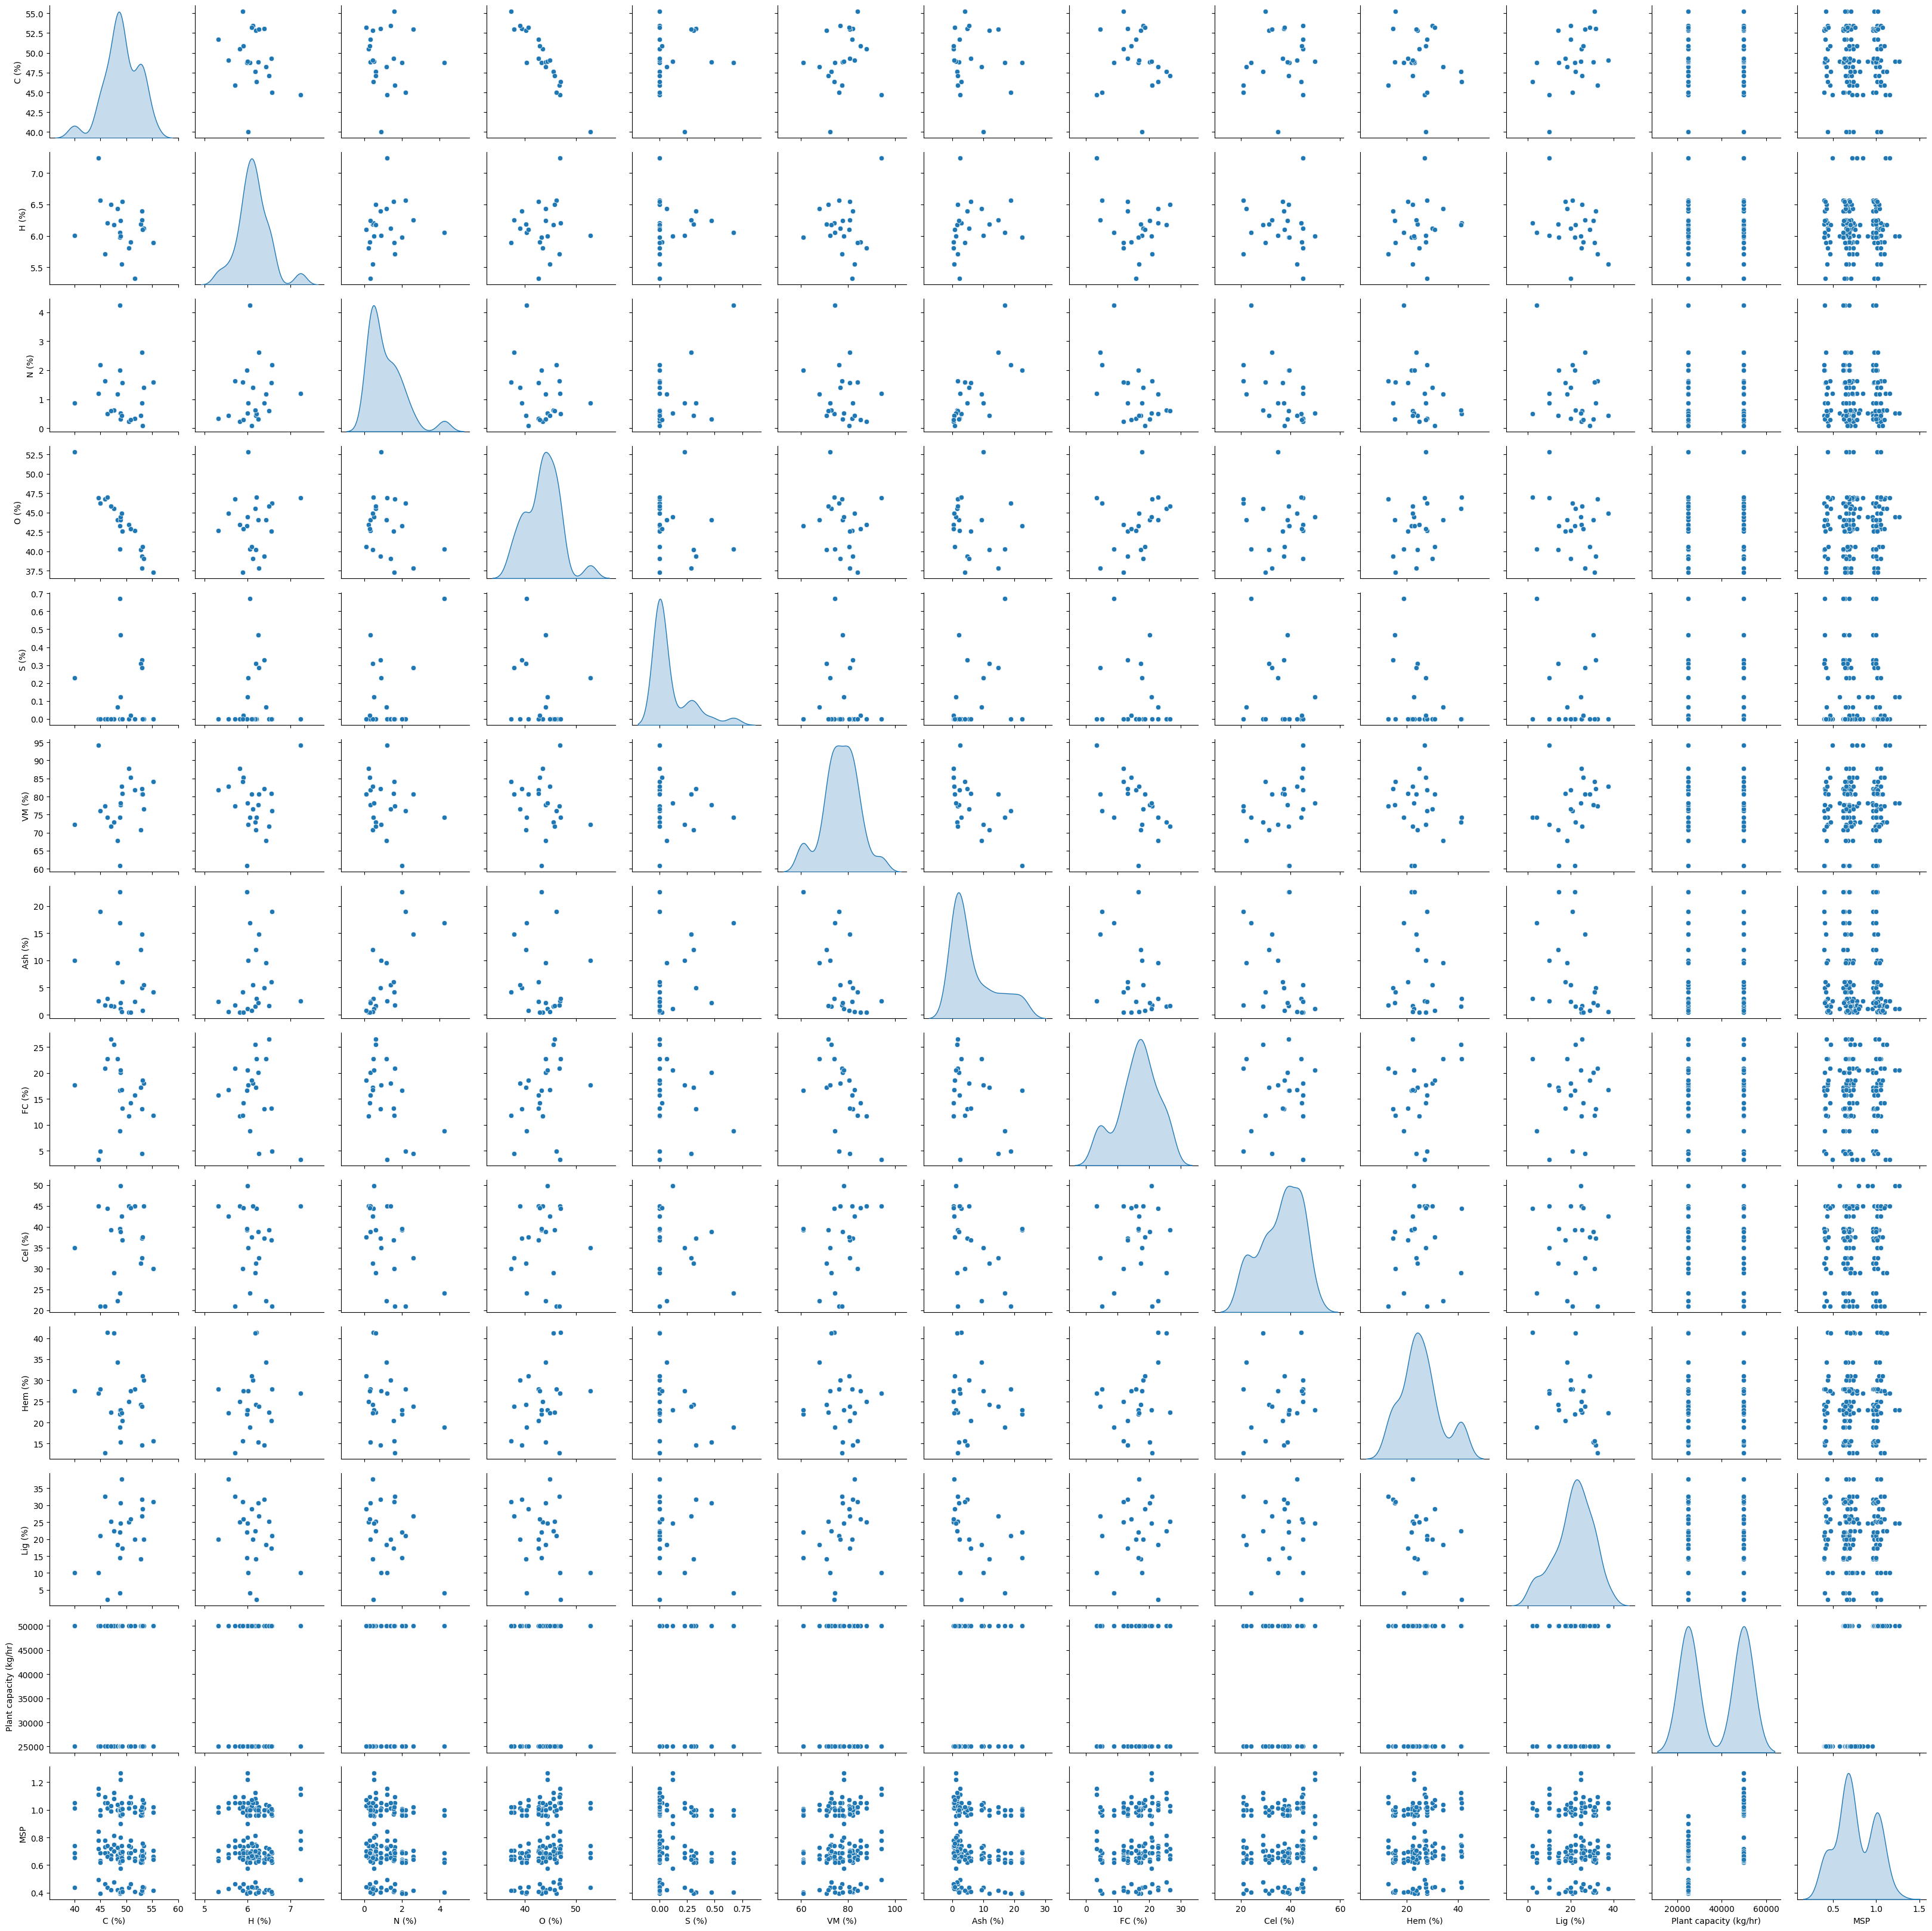

In [ ]:
# Function to identify one-hot encoded columns
def identify_encoded_columns(df):
    return [col for col in df.columns if df[col].isin([0, 1]).all()]

# Function to create scatter plots for continuous vs binary variables
def create_cont_scatter_plots(df, cont_vars):
    for i, var1 in enumerate(cont_vars):
        for var2 in cont_vars[i+1:]:  # This ensures we don't plot a variable against itself
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=var1, y=var2, data=df)
            plt.title(f'Scatter plot of {var1} vs {var2}')
            plt.tight_layout()
            plt.show()

# Function to create pair plots
def create_pair_plot(df, vars):
    plt.figure(figsize=(12, 10))
    sns.pairplot(df[vars], diag_kind='kde')
    plt.tight_layout()
    plt.show()

# Function to create stacked bar plots for encoded variables
def create_stacked_bar_plots(df, encoded_vars):
    encoded_sum = df[encoded_vars].sum().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    encoded_sum.plot(kind='bar')
    plt.title('Frequency of Encoded Categories')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Identify numeric and encoded columns
encoded_cols = identify_encoded_columns(df_encoded)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col not in encoded_cols]

# # Use all numeric columns by default
# key_numeric_vars = numeric_cols.tolist()

# Create scatter plots for continuous vs encoded variables
create_cont_scatter_plots(df_encoded, numeric_cols)

# Create stacked bar plot for encoded variables
create_stacked_bar_plots(df_encoded, encoded_cols)

# Create pair plot for numeric variables
create_pair_plot(df_encoded, numeric_cols)


Follow up: Based on the correlation heatmap and the plot, location and plant capacity affect MSP the most

# **Step 9**: Dealing with Multicollinearity
Task: Identify pairs of highly correlated variables (with correlation coefficients close to 1 or -1)

Follow up: Decide on how to handle multicollinearity. Might choose to
- Drop one of the correlated variables
- Combine correlated variables into a new feature


In [ ]:
def identify_multicollinearity(df, threshold=0.8):
    # Select numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Compute the correlation matrix
    corr_matrix = numeric_df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index of feature columns with correlation greater than threshold
    highly_correlated = [(upper.index[i], upper.columns[j], upper.iloc[i, j])
                         for i in range(len(upper.index))
                         for j in range(i+1, len(upper.columns))
                         if upper.iloc[i, j] > threshold]

    return highly_correlated, corr_matrix

# def plot_correlation_heatmap(corr_matrix):
#     plt.figure(figsize=(12, 10))
#     sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
#     plt.title('Correlation Heatmap')
#     plt.tight_layout()
#     plt.show()



# Identify highly correlated variables
threshold = 0.8  # You can adjust this threshold
highly_correlated, corr_matrix = identify_multicollinearity(df, threshold)

# Plot correlation heatmap
# plot_correlation_heatmap(corr_matrix)

# Print highly correlated pairs
print(f"\nHighly correlated variable pairs (threshold = {threshold}):")
for var1, var2, corr in highly_correlated:
    print(f"'{var1}' and '{var2}': {corr:.2f}")


Highly correlated variable pairs (threshold = 0.8):
'C (%)' and 'O (%)': 0.81


In [ ]:
def handle_multicollinearity(df, correlated_pairs):
    print("\nOptions for handling multicollinearity:")
    for i, (var1, var2, corr) in enumerate(correlated_pairs):
        print(f"\n{i+1}. Correlation between '{var1}' and '{var2}': {corr:.2f}")
        print("   Options:")
        print(f"   a) Drop '{var1}'")
        print(f"   b) Drop '{var2}'")
        print(f"   c) Create a new feature (e.g., ratio of '{var1}' and '{var2}')")
        print("   d) Keep both variables")

        choice = input("   Enter your choice (a/b/c/d): ").lower()

        if choice == 'a':
            df = df.drop(columns=[var1])
            print(f"   Dropped '{var1}'")
        elif choice == 'b':
            df = df.drop(columns=[var2])
            print(f"   Dropped '{var2}'")
        elif choice == 'c':
            new_feature = f"{var1}/{var2}"
            df[new_feature] = (df[var1] / df[var2])
            print(f"   Created new feature '{new_feature}'")
        elif choice == 'd':
            print("   Keeping both variables")
        else:
            print("   Invalid choice. Keeping both variables.")

    return df

In [ ]:
df_processed = handle_multicollinearity(df_encoded, highly_correlated)



Options for handling multicollinearity:

1. Correlation between 'C (%)' and 'O (%)': 0.81
   Options:
   a) Drop 'C (%)'
   b) Drop 'O (%)'
   c) Create a new feature (e.g., ratio of 'C (%)' and 'O (%)')
   d) Keep both variables


# **Step 10: Final Thought**
a, Which variables are most important in determining the MSP of SAF
=> location + plant capacity

b, Are there any data quality issues (missing value, outliers) that you have to address
=> Yes. Remove 36 row because of outliers

c, Document any assumptions you made during the analysis and justify them

Deliverable
1. A clean, processed dataset after handling msising data, outliers, and redudant column
(df_processed variable)
2. A report summarizing the key findings of your EDA, including
- Insight from the summary statistics and correlation analysis ( Detailed information and analysis in Step 4 and Step 7)
- Visualization (scatter plots, heatmaps, etc) that highlight trends in the data (Images is in Step 6,7)
- An explaination of how you handled data issues and what decisions you make
+ I removed all the outliers + redundant columns
+ Multicollinearity: I create new column.



Hypothesis:
The Minimum Selling Price (MSP) of Sustainable Aviation Fuel (SAF) is primarily influenced by economic factors rather than biomass characteristics, with plant capacity, and plant location being the most significant predictors.

Direction: Do a clustering analysis based on the plant location and plant capacity


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
# df = pd.read_csv('/content/SAF Dataset.xlsx')
df = pd.read_excel('/content/SAF Dataset.xlsx')

df_processed.head()


def create_msp_plots_by_location(data, location_columns):
    capacities = [0, 25000, 50000]

    for location in location_columns:
        plt.figure(figsize=(10, 6))

        location_data = data[data[location] == 1]

        sns.scatterplot(data=location_data, x='Plant capacity (kg/hr)', y='MSP')

        plt.title(f'MSP vs Plant Capacity for {location.replace("Location_", "")}')
        plt.xlabel('Plant Capacity (kg/hr)')
        plt.ylabel('MSP')
        plt.xticks(capacities)
        plt.tight_layout()
        plt.plot()

# Identify location columns (assuming they start with 'Location_')
location_columns = [col for col in df.columns if col.startswith('Location')]

if not location_columns:
    print("No location columns found. Please check your column names.")
else:
    create_msp_plots_by_location(df, location_columns)

print("Script execution completed.")